In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. <br>
<b> For retaining high profitable customers which is the number one business goal, we need to predict which customers are at high risk of churn.

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import pandas_profiling as pp

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#To view all the columns of the dataframe
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',300)

In [5]:
#Reading the dataset into dataframe
df = pd.read_csv('./telecom_churn_data.csv')

#### DATA UNDERSTANDING

In [6]:
#Head of the dataframe
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
#Initial dimension of the dataframe
df.shape

(99999, 226)

Hence the initial dataset in hand has got 99999 rows and 226 features/columns.

In [8]:
#Statistics of the dataset.
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

As we can see there are 99999 rows total and from above we can see that there are missing values present for some of the attributes present in the dataset. Hence data cleaning needs to be done.

#### SUGGESTED DATA PREPARATION

#### Filtering the high value customers
High value customers are those who recharged with an amount more than or equal to 70th percentile of the average recharge amount in the first two months which is also the Good Phase which includes the months 6 and 7.

#### 1.Deriving new feature - Avg_Recharge_amnt_GoodPhase

In [9]:
#Checking whether NULL values present for the columns `total_rech_amt_6,total_rech_amt_7`
df[['total_rech_amt_6','total_rech_amt_7']].isnull().sum()

total_rech_amt_6    0
total_rech_amt_7    0
dtype: int64

In [10]:
#Finding the average recharge amount for the Good Phase by deriving new feature `Avg_Recharge_amnt_GoodPhase`
df['Avg_Recharge_amnt_GoodPhase'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2

In [11]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_Recharge_amnt_GoodPhase
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,

#### 2. Filtering the High value cutomers into df_hvc

In [12]:
#Finding out the cutoff value which is the 70th percentile of average recharge amount.
cut_off = df['Avg_Recharge_amnt_GoodPhase'].quantile(0.7)
cut_off

368.5

In [13]:
#Since we got the cut off, now we will filter out the High value customers data alone into df_hvc
df_hvc = df[df['Avg_Recharge_amnt_GoodPhase'] >= cut_off]

In [14]:
#Final dimension
df_hvc.shape

(30011, 227)

In [15]:
df[df['Avg_Recharge_amnt_GoodPhase'] > cut_off].shape

(29979, 227)

We see that the no of high value customers with average recharge greater than the 70th percentile of average recharge is 29.9k. But since the problem statement demands for customers greater than or equal to the cut off value, we will go with our df_hvc.

In [16]:
df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_Recharge_amnt_GoodPhase
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39

#### 3.Tag churners and remove attributes of the churn phase

In [17]:
#Checking whether NULL values present for the columns 'total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'
df_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [18]:
def conditions(s):
    if ((s['total_ic_mou_9']==0 or s['total_og_mou_9']==0) and (s['vol_2g_mb_9']==0 or s['vol_3g_mb_9']==0)):
        return 1
    else:
        return 0
df_hvc['Churn'] = df_hvc.apply(conditions,axis=1)

In [19]:
df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_Recharge_amnt_GoodPhase,Churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83

In [20]:
df_hvc[df_hvc.Churn == 1].shape

(3047, 228)

In [21]:
df_hvc[df_hvc.Churn == 0].shape

(26964, 228)

We could find that there is data inbalance present between Churn and Not Churn cases in the dataset. If we observe the dataset above, we could find there are 3047 Churn customers and 26964 Non-Churn customer data present in the dataset,

Now we can go ahead and drop all the features related to the Churn phase i.e all attributes having ‘ _9’, etc. in their names, since we have already mapped out Churn customer case as above. 

In [22]:
#List of columns to remove whih is for September month.
col_list1 = ['last_date_of_month_9','arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9']
col_list2 = ['std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9']
col_list3 = ['std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_t2o_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9','max_rech_amt_9']
col_list4 = ['date_of_last_rech_9','last_day_rch_amt_9','date_of_last_rech_data_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','vol_2g_mb_9','vol_3g_mb_9','arpu_3g_9']
col_list5 = ['arpu_2g_9','night_pck_user_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','fb_user_9','sep_vbc_3g']

In [23]:
df_hvc.drop(col_list1,axis=1,inplace=True)
df_hvc.drop(col_list2,axis=1,inplace=True)
df_hvc.drop(col_list3,axis=1,inplace=True)
df_hvc.drop(col_list4,axis=1,inplace=True)
df_hvc.drop(col_list5,axis=1,inplace=True)

In [24]:
df_hvc.shape

(30011, 173)

In [25]:
from collections import Counter
Counter(df_hvc['last_date_of_month_6'])

Counter({'6/30/2014': 30011})

In [26]:
from collections import Counter
Counter(df_hvc['last_date_of_month_7'])

Counter({'7/31/2014': 29980, nan: 31})

In [27]:
from collections import Counter
Counter(df_hvc['last_date_of_month_8'])

Counter({'8/31/2014': 29854, nan: 157})

From above we can see that, say for eg: last_date_of_month_6 , the value for each customer is same that is 06/30/2014. Hence there is no variance in the feature. Hence we can drop this column. Similarly for the other 2 columns of - `last_date_of_month_7 and last_date_of_month_8` as well

In [28]:
df_hvc.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

In [29]:
df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Recharge_amnt_GoodPhase,Churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/

Now we can proceed to Data Cleaning and then come back to Data Preparation and follow with EDA.

In [30]:
df_hvc_copy = df_hvc.copy()

#### DATA CLEANING

In [31]:
#Finding the percentage of NUll values for each features
null_perc_df = pd.DataFrame(round(100 * (df_hvc.isnull().sum() / len(df_hvc.index)),2))
null_perc_df.sort_values(0,ascending=False,inplace=True)
null_perc_df = null_perc_df.loc[null_perc_df[0] > 0.00]

In [32]:
null_perc_df

,0
total_rech_data_6,62.02
arpu_2g_6,62.02
date_of_last_rech_data_6,62.02
arpu_3g_6,62.02
night_pck_user_6,62.02
max_rech_data_6,62.02
av_rech_amt_data_6,62.02
fb_user_6,62.02
count_rech_3g_6,62.02
count_rech_2g_6,62.02


We can find there are many columns containing missing values and hence need to be treated. Proper approach needs to be taken either to drop the features or NULL containing rows or to impute these features. We can go ahead and check for this.

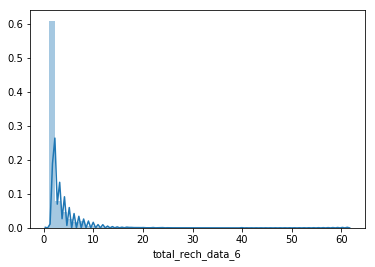

In [33]:
sns.distplot(df_hvc['total_rech_data_6'].dropna())

In [34]:
df_hvc['total_rech_data_6'].mean()

2.467491445117136

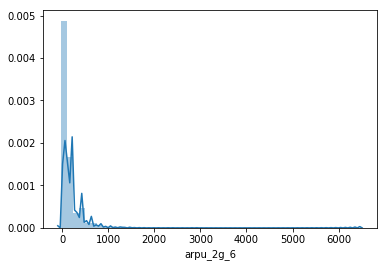

In [35]:
sns.distplot(df_hvc['arpu_2g_6'].dropna())

We can see after analysing two of the features having NULL values that these features are not normally distrubuted. Added to that, if we are trying to impute with mean for sure the distribution will be altered. We can go for mode imputation, but in this case, it would be better to drop the columns having more than 60% NULL values, since imputing these many values will affect our modelling,since it changes the data distribution for all these features.

In [36]:
#Finding all the features with NUll value percentage more than 60 and copying into a list
list_tobe_dropped = list(null_perc_df.loc[null_perc_df[0] > 60.00].index)

In [37]:
list_tobe_dropped

['total_rech_data_6',
 'arpu_2g_6',
 'date_of_last_rech_data_6',
 'arpu_3g_6',
 'night_pck_user_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'fb_user_6',
 'count_rech_3g_6',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'arpu_3g_7',
 'date_of_last_rech_data_7',
 'av_rech_amt_data_7',
 'fb_user_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'night_pck_user_8',
 'fb_user_8',
 'date_of_last_rech_data_8',
 'arpu_2g_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'arpu_3g_8',
 'av_rech_amt_data_8',
 'total_rech_data_8']

In [38]:
#Dropping all the features having more than 60% NULL values.
df_hvc.drop(list_tobe_dropped,axis=1,inplace=True)

In [39]:
df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Recharge_amnt_GoodPhase,Churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317

In [40]:
#Dimension of the dataset after the above process.
df_hvc.shape

(30011, 140)

In [41]:
null_perc_df = pd.DataFrame(round(100 * (df_hvc.isnull().sum() / len(df_hvc.index)),2))
null_perc_df.sort_values(0,ascending=False,inplace=True)
null_perc_df = null_perc_df.loc[null_perc_df[0] > 0.00]

In [42]:
null_perc_df

,0
loc_ic_t2f_mou_8,3.13
loc_ic_t2t_mou_8,3.13
loc_og_t2c_mou_8,3.13
loc_og_mou_8,3.13
std_og_t2t_mou_8,3.13
std_og_t2m_mou_8,3.13
std_og_t2f_mou_8,3.13
std_og_t2c_mou_8,3.13
std_og_mou_8,3.13
isd_og_mou_8,3.13


Before filling for the above columns, we can check for the row wise NUll values and check how many rows are present with more than 25 columns as missing. We can go ahead and remove this rows and only process the rest of the records.

In [43]:
df_hvc.loc[df_hvc.isnull().sum(axis=1) > 25].shape

(1150, 140)

In [44]:
df_hvc.shape

(30011, 140)

In [45]:
100 * ((df_hvc.loc[df_hvc.isnull().sum(axis=1) > 25].shape[0]) / (df_hvc.shape[0]))

3.8319282929592484

In [46]:
df_hvc = df_hvc.loc[df_hvc.isnull().sum(axis=1) <= 25]

Out of our 30011 records we can remove these 1150 records having more than 25 values as NULL which resulted in around 3.8% of data removal. We have retained around 96.2% of the records.

In [47]:
null_perc_df = pd.DataFrame(round(100 * (df_hvc.isnull().sum() / len(df_hvc.index)),2))
null_perc_df.sort_values(0,ascending=False,inplace=True)
null_perc_df = null_perc_df.loc[null_perc_df[0] > 0.00]
null_perc_df

,0
date_of_last_rech_8,1.08
date_of_last_rech_7,0.21
date_of_last_rech_6,0.11


We can see that only 3 features are with NULl values present that too small percentage. We can check for each of this column and decide what action can be taken.

In [48]:
df_hvc['date_of_last_rech_8'].mode()

0    8/31/2014
dtype: object

In [49]:
df_hvc['date_of_last_rech_7'].mode()

0    7/31/2014
dtype: object

In [50]:
df_hvc['date_of_last_rech_6'].mode()

0    6/30/2014
dtype: object

Rather than droppping for these columns,we can impute these values with the most common value.

In [51]:
#Imputing with mode
l=df_hvc.filter(["date_of_last_rech_6", "date_of_last_rech_7","date_of_last_rech_8"]).mode()
df_hvc[["date_of_last_rech_6", "date_of_last_rech_7","date_of_last_rech_8"]]=df_hvc[["date_of_last_rech_6", "date_of_last_rech_7","date_of_last_rech_8"]].fillna(value=l.iloc[0])

In [52]:
df_hvc = df_hvc[~df_hvc['arpu_6'].isnull()]
df_hvc = df_hvc[~df_hvc['arpu_7'].isnull()]
df_hvc = df_hvc[~df_hvc['arpu_8'].isnull()]

In [53]:
null_perc_df = pd.DataFrame(round(100 * (df_hvc.isnull().sum() / len(df_hvc.index)),2))
null_perc_df.sort_values(0,ascending=False,inplace=True)
null_perc_df = null_perc_df.loc[null_perc_df[0] > 0.00]
null_perc_df

,0


We can find that there are no more missing values in the dataset. Hence we have successfully cleaned the dataset.

After data cleaning drive, we have retained around 96.2% of the records.Hence we haven't missed out much of the imformation.

#### DATA INBALANCE

In [54]:
df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Recharge_amnt_GoodPhase,Churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317

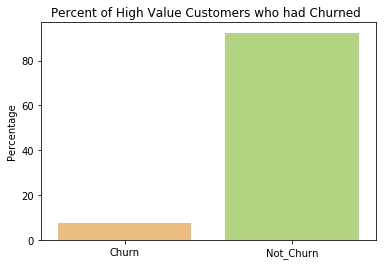

In [55]:
#Data Inbalance check for the Converted column.
yes=df_hvc[df_hvc['Churn']==1]['Churn'].value_counts()
no=df_hvc[df_hvc['Churn']==0]['Churn'].value_counts()

converted=np.array((yes/len(df_hvc))*100) 
not_converted=np.array((no/len(df_hvc))*100) 
stat_summ=pd.DataFrame({'Percentage':[converted[0],not_converted[0]]},index=['Churn','Not_Churn'])
sns.barplot(x=stat_summ.index,y=stat_summ['Percentage'],palette='RdYlGn')
plt.title('Percent of High Value Customers who had Churned ')
plt.show()

We can see that there exist Class Imbalance for the `Churn` column where the Churn percentage is far less compared to the percentage of Non- Churn cases present in the dataset. Class Imbalance can be a common scenario in case such as credit card or Loan default. Hence we can address this issue with the help of any one of these techniques such as Oversampling, Undersampling or Synthetic-Minority over -sampling techniques (SMOTE).

We can proceed with SMOTE in some time after doing a train_test_split.

#### DATA PREPARATION AGAIN AND EDA

In [56]:
df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Recharge_amnt_GoodPhase,Churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317

In [57]:
df_hvc.circle_id.value_counts()

109    28861
Name: circle_id, dtype: int64

In [58]:
df_hvc.shape

(28861, 140)

We can see that the circle_ID of every high value customer is same i.e 109 . Hence there is no variance present here in this column. Hence we can go ahead and drop this column. Also mobile_number feature,even though the most important feature that explains who all are the Churn customers, is not important for model building,since this is more like an index.

In [59]:
df_hvc.drop(['mobile_number','circle_id'],axis=1,inplace=True)

In [60]:
df_hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Recharge_amnt_GoodPhase,Churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144

Out of the date columns, we can see that only the dates of these features are varyinh whereas the month and year is same through out. Hence we can derive a new feature for the date alone and drop the original date columns.

In [61]:
new_6 = df_hvc['date_of_last_rech_6'].str.split('/',expand=True)
new_7 = df_hvc['date_of_last_rech_7'].str.split('/',expand=True)
new_8 = df_hvc['date_of_last_rech_8'].str.split('/',expand=True)

In [62]:
df_hvc['date_of_last_rech_6_new'] = new_6[1]
df_hvc['date_of_last_rech_7_new'] = new_7[1]
df_hvc['date_of_last_rech_8_new'] = new_8[1]

In [63]:
df_hvc.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

In [64]:
df_hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Recharge_amnt_GoodPhase,Churn,date_of_last_rech_6_new,date_of_last_rech_7_new,date_of_last_rech_8_new
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,27,25,26
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,25,31,30
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,

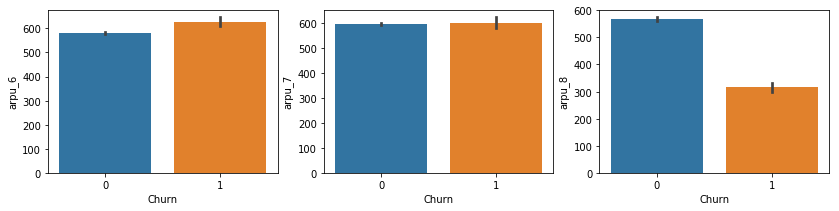

In [65]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
sns.barplot(y=df_hvc['arpu_6'],x=df_hvc['Churn'])
plt.subplot(1,3,2)
sns.barplot(y=df_hvc['arpu_7'],x=df_hvc['Churn'])
plt.subplot(1,3,3)
sns.barplot(y=df_hvc['arpu_8'],x=df_hvc['Churn'])

The above plot shows the average revenue per user generated over the months June, July and August for both Churn-Not Churn cases. You can see the revenue generated is almost same in for both the customers and no segreggation or pattern formed in the customer behaviour at least in terms of revenue generated for the first two months. But in the case of the August month, we can see a steep decrease in the revenue generated from the Churned customers.This can be a very good indicator that in the next month i,e 9th month - September that the Customers will churn.

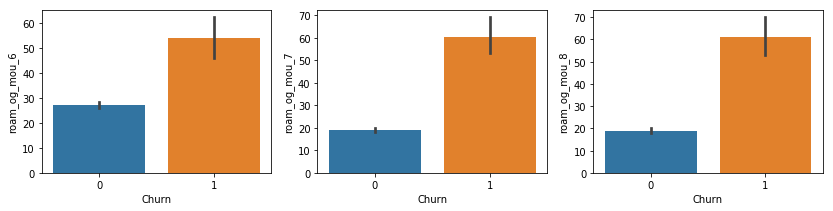

In [66]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
sns.barplot(y=df_hvc['roam_og_mou_6'],x=df_hvc['Churn'])
plt.subplot(1,3,2)
sns.barplot(y=df_hvc['roam_og_mou_7'],x=df_hvc['Churn'])
plt.subplot(1,3,3)
sns.barplot(y=df_hvc['roam_og_mou_8'],x=df_hvc['Churn'])

We can see that some inbalance present between churn and non churning customers based on the roaming outgoing calls usage. We can see that there is constant trend for the Churned people who use more outgoing minutes. Hence this cements the idea that the network provider must concentrate in areas of providing decent packs in Roaming category inorder of customer retention.

#### OUTLIER ANALYSIS

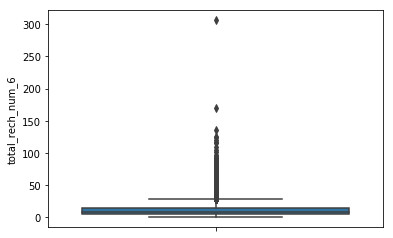

In [67]:
sns.boxplot(y=df_hvc['total_rech_num_6'])

We can see that there are outliers present for the above column total_rech_num_6. This feature indicates the total number of recharge done by a user in the month of June. We can see from the above boxplot that as many as 300 recharges was done by a user in the month. Hence we can remove these outliers.

In [68]:
#Removing the outlier for 'total_rech_num_6'
Q1 = df_hvc['total_rech_num_6'].quantile(0.05)
Q3 = df_hvc['total_rech_num_6'].quantile(0.95)
IQR = Q3 - Q1
df_hvc = df_hvc[(df_hvc['total_rech_num_6'] >= Q1) & (df_hvc['total_rech_num_6'] <= Q3)]

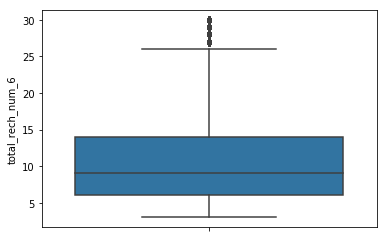

In [69]:
sns.boxplot(y=df_hvc['total_rech_num_6'])

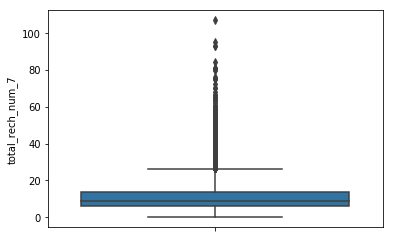

In [70]:
sns.boxplot(y=df_hvc['total_rech_num_7'])

In [71]:
#Removing the outlier for 'total_rech_num_7'
Q1 = df_hvc['total_rech_num_7'].quantile(0.05)
Q3 = df_hvc['total_rech_num_7'].quantile(0.95)
IQR = Q3 - Q1
df_hvc = df_hvc[(df_hvc['total_rech_num_7'] >= Q1) & (df_hvc['total_rech_num_7'] <= Q3)]

In [72]:
df_hvc.shape

(25032, 138)

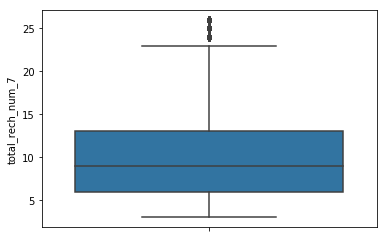

In [73]:
sns.boxplot(y=df_hvc['total_rech_num_7'])

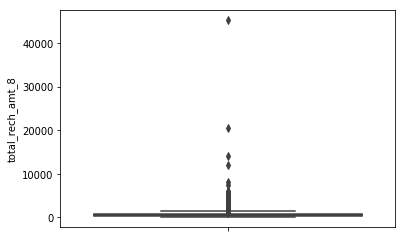

In [74]:
sns.boxplot(y=df_hvc['total_rech_amt_8'])

We can see that for the feature `total_rech_amnt_8` also, there are outliers present with almost recharge amount even of 40000 rs which is not normal scenario and cannot be generalised. Hence we can remove these outliers.

In [75]:
#Removing the outlier for 'total_rech_amt_8'
Q1 = df_hvc['total_rech_amt_8'].quantile(0.05)
Q3 = df_hvc['total_rech_amt_8'].quantile(0.95)
IQR = Q3 - Q1
df_hvc = df_hvc[(df_hvc['total_rech_amt_8'] >= Q1) & (df_hvc['total_rech_amt_8'] <= Q3)]

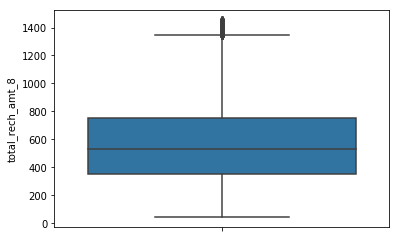

In [76]:
sns.boxplot(y=df_hvc['total_rech_amt_8'])

In [77]:
#Using Pandas profiling to speed up EDA process
#profile = pp.ProfileReport(df_hvc)
#profile.to_file(output_file="output.html")

In [78]:
df_hvc.shape

(22539, 138)

#### Dropping the no-variance columns

In [79]:
Counter(df_hvc['loc_ic_t2o_mou'])

Counter({0.0: 22539})

In [80]:
Counter(df_hvc['loc_og_t2o_mou'])

Counter({0.0: 22539})

In [81]:
Counter(df_hvc['std_ic_t2o_mou_6'])

Counter({0.0: 22539})

In [82]:
Counter(df_hvc['std_ic_t2o_mou_7'])

Counter({0.0: 22539})

In [83]:
Counter(df_hvc['std_ic_t2o_mou_8'])

Counter({0.0: 22539})

In [84]:
Counter(df_hvc['std_og_t2o_mou'])

Counter({0.0: 22539})

We can see there are no variance offered in hte above columns, hence we can drop these features.

In [85]:
df_hvc.drop(['loc_ic_t2o_mou','loc_og_t2o_mou','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_og_t2o_mou'],axis=1,inplace=True)

We can also go ahead and drop the initial basic columns - 'total_rech_amt_6','total_rech_amt_7' from which Average amount column was derived.

In [86]:
df_hvc.drop(['total_rech_amt_6','total_rech_amt_7'],axis=1,inplace=True)

In [87]:
df_hvc.shape

(22539, 130)

#### Checking some of the highly correlated variables

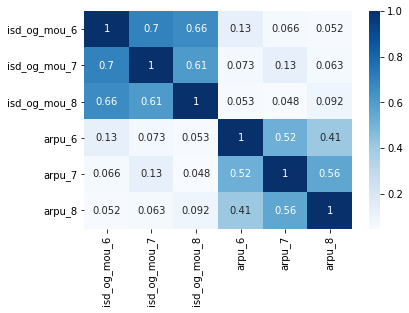

In [88]:
cols = ['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','arpu_6','arpu_7','arpu_8']
sns.heatmap(df_hvc[cols].corr(),annot=True,cmap="Blues")

We can see that from the above heatmap for the correlations betwen features such as arpu's and the isd_og_mou that some of the features are highly correlated. For eg. Isd_og_mou for the months 6,7 and 8 are very highly correlated and almost explains the same set of values. Hence we can go ahead and drop these features and retain only 1.

In [89]:
df_hvc.drop(['isd_og_mou_7','isd_og_mou_8'],axis=1,inplace=True)

In [90]:
df_hvc.shape

(22539, 128)

In [91]:
df_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Recharge_amnt_GoodPhase,Churn,date_of_last_rech_6_new,date_of_last_rech_7_new,date_of_last_rech_8_new
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,25,31,30
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,0.00,4.78,0.0,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,20,22,30
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.00,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.00,3.26,5.91,0.0,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,30,31,14
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.0,0.00,97.04,

#### Variations in `arpu`,`onnet` and `offnet`

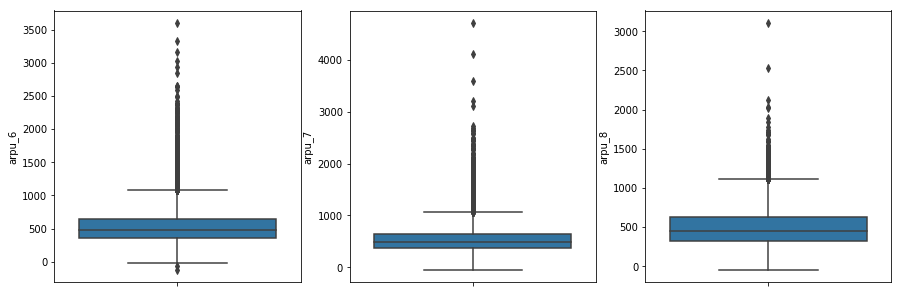

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y=df_hvc['arpu_6'])
plt.subplot(1,3,2)
sns.boxplot(y=df_hvc['arpu_7'])
plt.subplot(1,3,3)
sns.boxplot(y=df_hvc['arpu_8'])
plt.show()

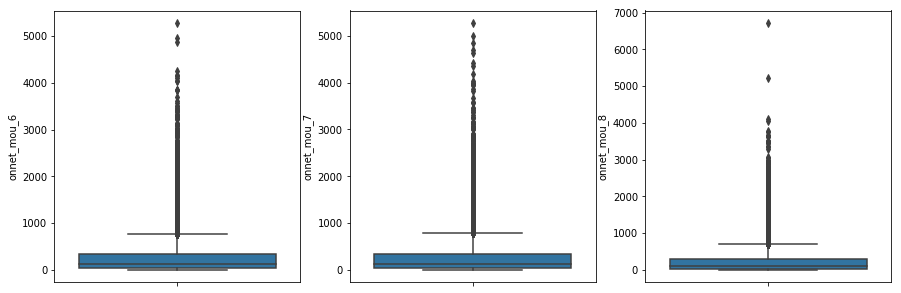

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y=df_hvc['onnet_mou_6'])
plt.subplot(1,3,2)
sns.boxplot(y=df_hvc['onnet_mou_7'])
plt.subplot(1,3,3)
sns.boxplot(y=df_hvc['onnet_mou_8'])
plt.show()

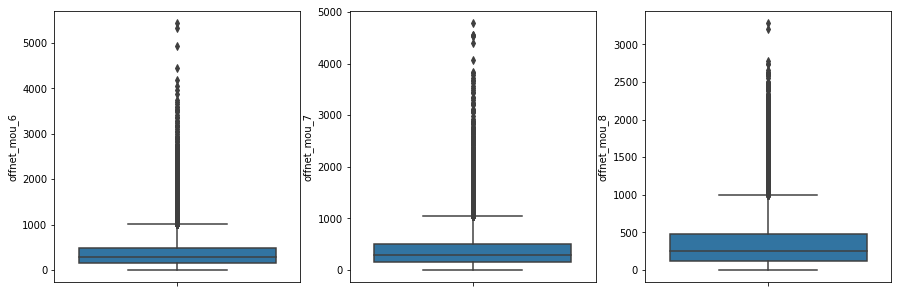

In [94]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y=df_hvc['offnet_mou_6'])
plt.subplot(1,3,2)
sns.boxplot(y=df_hvc['offnet_mou_7'])
plt.subplot(1,3,3)
sns.boxplot(y=df_hvc['offnet_mou_8'])
plt.show()

#### SKEWNESS ANALYSIS

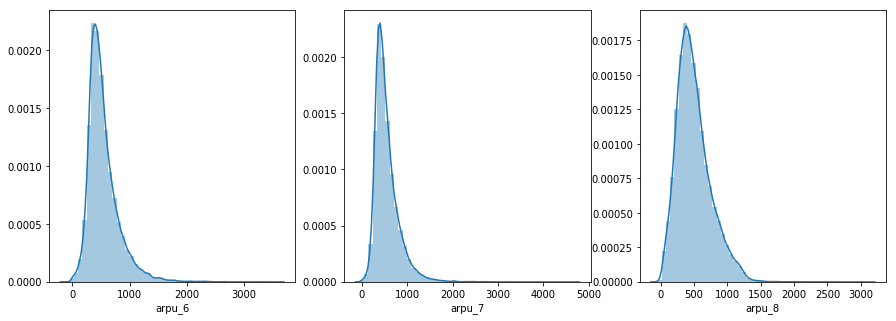

In [95]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(df_hvc['arpu_6'])
plt.subplot(1,3,2)
sns.distplot(df_hvc['arpu_7'])
plt.subplot(1,3,3)
sns.distplot(df_hvc['arpu_8'])
plt.show()

We can observe the ditribution plots for the arpu feature for the months of 6,7 and 8 asa above. We can see that even though the values are normally distributed, the distribution is skewed. We need to treat for the skewness. <br>
We know the general methods of treatment for skewness include Squareroot Transformation, Reciprocal Transformation,Log Transformation and Boxcox transformation. We can do go with Normalisation in some time inorder to resolve this issue. Normalisation of features can solve many issues such as heteroscedacity. 

In [96]:
df_hvc.shape

(22539, 128)

#### Converting Object Columns to Continuous

In [97]:
df_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22539 entries, 8 to 99997
Columns: 128 entries, arpu_6 to date_of_last_rech_8_new
dtypes: float64(101), int64(24), object(3)
memory usage: 22.2+ MB


We can see that there are 3 object columns present in the dataframe, while rest all are numerical columns. We can see which are these columns and convert these into numerical.

In [98]:
df_hvc.select_dtypes('object').columns

Index(['date_of_last_rech_6_new', 'date_of_last_rech_7_new',
       'date_of_last_rech_8_new'],
      dtype='object')

In [99]:
df_hvc.select_dtypes('object').head()

,date_of_last_rech_6_new,date_of_last_rech_7_new,date_of_last_rech_8_new
8,25,31,30
13,20,22,30
16,30,31,14
21,30,31,31
24,23,17,31


We know, date_of_last_rech new columns are the ones we derived from original `date_of_last_rech` column. We can convert these columns to numeric columns.

In [100]:
cols_to_convert = list(df_hvc.select_dtypes('object').columns)

In [101]:
df_hvc[cols_to_convert] = df_hvc[cols_to_convert].astype(int)

In [102]:
df_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22539 entries, 8 to 99997
Columns: 128 entries, arpu_6 to date_of_last_rech_8_new
dtypes: float64(101), int32(3), int64(24)
memory usage: 21.9 MB


Now we can see that all the columns present are numerical ones.

#### Correlation of the features with the target variables

In [103]:
full_columns = list(df_hvc.columns)
corr_df = pd.DataFrame(df_hvc[full_columns].corr()['Churn'][:])
corr_df.sort_values(by='Churn',ascending=False)

,Churn
Churn,1.000000
roam_og_mou_8,0.160683
roam_ic_mou_8,0.119983
roam_og_mou_7,0.115185
std_og_mou_6,0.098733
roam_ic_mou_7,0.095246
std_og_mou_7,0.087644
std_og_t2t_mou_6,0.079294
roam_og_mou_6,0.070266
std_og_t2m_mou_6,0.066375


The above shows the correlation values between the Target value 'Churn' and all the other predictor variables. From above we can see that there are no that highly correlated features with the target variable and all are almost near zero values. Hence there are no special preparation needed for highly correlated features. Hence we can proceed further.

Hence we have almost completed EDA part along with Data cleaning and data preparation. We can proceed with train test split now.

Before that we can do quick check on the stats of the final dataset after all the above process.

In [104]:
df_hvc.shape

(22539, 128)

In [105]:
df_hvc_copy.shape

(30011, 170)

In [106]:
100 * (df_hvc.shape[0] / df_hvc_copy.shape[0])

75.10246243044217

Hence we have retained around 73.52% of the data after all the process of Data Cleaning and Data Preparation.

In [107]:
df_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22539 entries, 8 to 99997
Columns: 128 entries, arpu_6 to date_of_last_rech_8_new
dtypes: float64(101), int32(3), int64(24)
memory usage: 21.9 MB


All of the columns are continuous with most of them being float.

In [108]:
#Head of the dataset
df_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Recharge_amnt_GoodPhase,Churn,date_of_last_rech_6_new,date_of_last_rech_7_new,date_of_last_rech_8_new
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,25,31,30
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,0.00,4.78,0.0,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,20,22,30
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.00,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.00,3.26,5.91,0.0,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,30,31,14
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.0,0.00,97.04,

##### DATASET IS READY!!!

In [109]:
#Keeping a copy of the dataset after data preparation and data cleaning drive.
final_df = df_hvc.copy()

#### Train-Test Split

In [110]:
#Importing the train test split
from sklearn.model_selection import train_test_split

In [111]:
#Placing all the feature variables into X and the response feature into y.
X = df_hvc.drop(['Churn'],axis=1)
y = df_hvc['Churn']

In [112]:
#coverting the datasets into train-test in the ratio 70-30 with random state as 100
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [113]:
X_train.shape

(15777, 127)

In [114]:
X_test.shape

(6762, 127)

In [115]:
y_train.shape

(15777,)

In [116]:
y_test.shape

(6762,)

#### SMOTE FOR CLASS IMBALANCE

As earlier, we saw clear Class imbalance between the two classes of Churn and Not Churn where most of the classes being Not Churn. Hence we can go with the method of <b> `SMOTE` - or `Synthetic Minority Over Sampling Techniques` </b> to oversample our minority classes(The Churn cases here) in a manner that does not simply duplicate random records.

In [117]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 872
Before OverSampling, counts of label '0': 14905 



In [118]:
# import SMOTE module from imblearn library 
#pip install of imblearn is needed if not present in the system
#!pip install imblearn
from imblearn.over_sampling import SMOTE
smot = SMOTE()
X_smot,y_smot = smot.fit_sample(X_train,y_train)

In [119]:
print('After OverSampling, the shape of X_train: {}'.format(X_smot.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_smot.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_smot == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_smot == 0))) 

After OverSampling, the shape of X_train: (29810, 127)
After OverSampling, the shape of y_train: (29810,) 

After OverSampling, counts of label '1': 14905
After OverSampling, counts of label '0': 14905


We can see that after appying SMOTE, the Churn cases are oversampled and the counts for both the labels have become same. The final no of records in the train dataset has increased to 29810.

#### Feature Scaling

In [120]:
X_smot = pd.DataFrame(X_smot,columns=X_train.columns)

In [121]:
y_smot = pd.DataFrame(y_smot,columns=['Churn'])

In [122]:
X_smot.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Recharge_amnt_GoodPhase,date_of_last_rech_6_new,date_of_last_rech_7_new,date_of_last_rech_8_new
0,744.620,806.691,472.107,155.98,47.78,34.71,371.93,530.91,279.93,0.0,0.00,0.0,0.0,0.00,0.0,22.31,27.23,23.01,50.09,42.69,22.99,3.86,1.93,0.00,0.48,0.00,15.96,76.28,71.86,46.01,133.66,20.54,11.69,317.48,486.28,239.31,0.0,0.00,0.0,0.0,0.0,0.0,451.14,506.83,251.01,0.0,0.48,0.00,17.61,0.00,0.0,0.0,527.91,578.69,314.64,25.16,26.58,31.63,20.46,24.34,16.14,3.56,1.19,0.25,49.19,52.13,48.03,1.81,0.08,1.58,9.36,3.78,4.63,0.00,0.00,0.00,11.18,3.86,6.21,60.38,55.99,56.23,0.00,0.0,0.0,0.00,0.0,1.81,0.00,0.0,0.16,11.0,14.0,7.0,632.0,154.0,154.0,175.0,110.0,0.0,0.0,22.01,0.06,0.02,915.42,477.30,462.57,2.0,1.0,1.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,484.0,0.0,18.42,413.88,903.0,30.0,31.0,26.0
1,377.930,456.974,226.746,218.98,421.56,574.83,801.03,509.31,381.96,0.0,0.00,0.0,0.0,0.00,0.0,218.98,421.56,574.83,765.71,503.18,357.04,21.19,0.56,0.00,0.11,0.00,0.00,1005.89,925.31,931.88,0.00,0.00,0.00,7.51,0.00,17.96,0.0,5.55,0.0,0.0,0.0,0.0,7.51,5.55,17.96,0.0,7.14,0.08,6.53,0.00,0.0,0.0,1020.56,930.94,957.01,58.41,128.76,95.41,237.03,246.61,219.64,0.00,0.46,0.00,295.44,375.84,315.06,0.00,0.00,0.00,0.00,3.96,0.00,0.00,0.00,1.35,0.00,3.96,1.35,295.44,379.81,316.64,0.00,0.0,0.0,0.00,0.0,0.23,0.00,0.0,0.00,10.0,12.0,5.0,330.0,50.0,215.0,130.0,50.0,50.0,130.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2711.0,0.0,0.00,0.00,479.5,27.0,30.0,25.0
2,536.838,473.032,584.881,32.28,26.03,34.53,304.64,326.73,378.08,0.0,0.00,0.0,0.0,0.00,0.0,32.28,26.03,34.19,270.39,252.58,329.88,17.96,28.09,39.46,12.19,12.09,0.00,320.64,306.71,403.54,0.00,0.00,0.33,4.08,0.68,8.63,0.0,0.00,0.1,0.0,0.0,0.0,4.08,0.68,9.06,0.0,12.19,45.36,0.00,2.25,0.0,0.0,339.18,352.76,412.61,34.89,28.38,36.88,260.31,411.86,258.69,11.18,22.58,118.11,306.39,462.83,413.69,0.00,0.00,0.78,0.00,0.76,3.66,1.09,0.00,0.00,1.09,0.76,4.45,307.56,463.59,418.14,0.00,0.0,0.0,0.06,0.0,0.00,0.00,0.0,0.00,10.0,7.0,5.0,642.0,252.0,252.0,252.0,252.0,120.0,130.0,109.17,0.00,0.00,214.62,1245.51,946.43,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1015.0,0.0,0.00,0.00,622.5,24.0,27.0,21.0
3,733.492,615.650,860.089,1317.63,870.99,1115.56,73.89,108.

In [123]:
#Importing the Standard Scaler
from sklearn.preprocessing import StandardScaler

In [124]:
#Initialising the scaler object and fit_transform the X_train
scaler = StandardScaler()
full_cols = list(X_smot.columns)
X_smot[full_cols] = scaler.fit_transform(X_smot[full_cols])

In [125]:
X_smot.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Recharge_amnt_GoodPhase,date_of_last_rech_6_new,date_of_last_rech_7_new,date_of_last_rech_8_new
0,0.752806,1.004967,0.209321,-0.358395,-0.614150,-0.542808,-0.041997,0.311339,-0.022928,-0.248074,-0.224749,-0.270209,-0.283122,-0.288484,-0.361573,-0.276971,-0.263595,-0.228705,-0.502118,-0.533538,-0.546310,-0.070965,-0.205043,-0.302829,-0.188125,-0.292927,2.338851,-0.498716,-0.525348,-0.505292,-0.210989,-0.498161,-0.427489,0.292490,0.674105,0.365082,-0.152567,-0.141810,-0.129544,0.0,0.0,0.0,0.043968,0.116279,-0.069103,-0.101831,-0.397833,-0.409349,0.715689,-0.345551,-0.023558,-0.021803,-0.237351,-0.169810,-0.318457,-0.247557,-0.216903,-0.130981,-0.629959,-0.596641,-0.543232,-0.226826,-0.267187,-0.295009,-0.594691,-0.556932,-0.482326,-0.225522,-0.277083,-0.198055,-0.246106,-0.290619,-0.239592,-0.171203,-0.161973,-0.158787,-0.319372,-0.375451,-0.295896,-0.668831,-0.657290,-0.542670,-0.361158,-0.099544,-0.206187,-0.177736,-0.18335,-0.121557,-0.124754,-0.127684,-0.107875,0.009060,0.629009,-0.234629,0.543713,0.054649,-0.022162,0.262332,0.234203,-0.991930,-0.787449,-0.207827,-0.286615,-0.258665,1.024015,0.318519,0.492915,5.647303,2.545344,2.963878,1.747903,2.421572,1.108735,-0.305655,-0.314316,-0.271276,-0.196745,-0.207588,-0.164674,-0.718095,-0.307312,-0.270316,0.929082,0.960297,0.845948,0.915330,0.071370
1,-0.587469,-0.338627,-0.775068,-0.210591,0.269189,1.085062,1.024878,0.260251,0.299393,-0.248074,-0.224749,-0.270209,-0.283122,-0.288484,-0.361573,0.704669,1.906950,3.252171,3.180318,1.793154,1.421557,1.065919,-0.296665,-0.302829,-0.260278,-0.292927,-0.268446,2.509030,2.338675,2.855427,-0.555045,-0.549851,-0.466593,-0.551778,-0.563484,-0.445973,-0.152567,0.466649,-0.129544,0.0,0.0,0.0,-0.767565,-0.771815,-0.620343,-0.101831,0.091890,-0.404927,0.055423,-0.345551,-0.023558,-0.021803,0.613864,0.432491,1.036944,0.006576,0.474157,0.378230,0.574713,0.623641,0.626619,-0.316116,-0.283061,-0.301952,0.352033,0.621214,0.577520,-0.255008,-0.278545,-0.231348,-0.368537,-0.288588,-0.301710,-0.171203,-0.161973,-0.026571,-0.422177,-0.374584,-0.345688,0.115779,0.365833,0.351883,-0.361158,-0.099544,-0.206187,-0.177736,-0.18335,-0.149906,-0.124754,-0.127684,-0.129723,-0.181079,0.241739,-0.608323,-0.481713,-0.9065

In [126]:
X_smot_copy = X_smot.copy()
y_smot_copy = y_smot.copy()

#### PCA on dataset

We can apply the above scaled and also balanced dataset to PCA and find out the Principal Components. We can use Principal Components as part of Dimensionality Reduction Technique, since we are having as many as 127 features in hand.

In [127]:
#Importing th PCA module and using the random state of 42
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=42)

In [128]:
#Performing the PCA on our scaled dataframe
pca.fit(X_smot)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [129]:
#List of PCA components
pca.components_

array([[ 7.15543899e-02,  7.10117544e-02,  1.09041386e-01, ...,
        -3.76474614e-02, -2.09831703e-02, -1.01414696e-02],
       [ 1.26218188e-01,  1.54133068e-01,  1.31166489e-01, ...,
         8.02209989e-02,  8.04366721e-02,  5.03891498e-02],
       [ 1.33486469e-01,  1.80534097e-01,  1.56654419e-01, ...,
        -7.68116484e-02, -4.93471706e-02, -2.38569547e-02],
       ...,
       [-0.00000000e+00,  5.70939726e-17, -3.33487925e-17, ...,
        -1.72216473e-16,  7.81060868e-17, -1.16607054e-16],
       [ 0.00000000e+00, -1.06797524e-16,  1.50748738e-16, ...,
         4.73969485e-17, -2.61248818e-17, -8.84826387e-18],
       [-0.00000000e+00,  9.93555067e-17,  9.52790948e-18, ...,
        -5.95488118e-17,  2.36009455e-17, -1.47603121e-16]])

In [130]:
pca.n_components_

127

In [131]:
#Explained variance ratio
pca.explained_variance_ratio_.round(2)

array([0.11, 0.08, 0.06, 0.05, 0.04, 0.04, 0.03, 0.03, 0.03, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

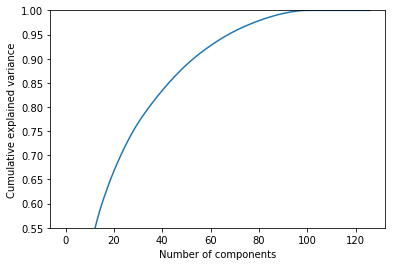

In [132]:
#Plotting the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim([0.55,1.0])
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

From the above screeplot which is a plot between the number of components and cumulative variance explained ,we can see that almost 80%+ variance is explained by 40 components. Hence we can prepare the pca object with 40 components and fit it with our train dataset over which we have run smote.

In [133]:
#We will now fit_trainsform the train for 60 PCA components.
pca = PCA(n_components=40)
pca_X = pca.fit_transform(X_smot)

In [134]:
#Importing the sklearn libraries for Logistic Regression and Decision Tree.
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### PCA with Logistic Regression

In [135]:
#Instantiating the logistic Regression object and fitting on our X and y.
logreg = LogisticRegression()
logreg.fit(pca_X,y_smot)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
#Predicting with our train pca_X
y_train_pred = logreg.predict(pca_X)

In [137]:
y_train_pred[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [138]:
#Accuracy score on train.
logreg.score(pca_X,y_smot)

0.8149278765514928

In [139]:
#Creating a new dataframe with Original y and predicted Churn
Churn_prediction = pd.DataFrame(y_smot,columns = ['Churn'])
Churn_prediction['Prediction_LR'] = y_train_pred

In [140]:
Churn_prediction.head()

,Churn,Prediction_LR
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [141]:
#Importing the sklearn metric
from sklearn import metrics

In [142]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix

In [143]:
precision_score(Churn_prediction['Churn'],Churn_prediction['Prediction_LR'])

0.8066370525215574

In [144]:
recall_score(Churn_prediction['Churn'],Churn_prediction['Prediction_LR'])

0.8284468299228447

In [145]:
accuracy_score(Churn_prediction['Churn'],Churn_prediction['Prediction_LR'])

0.8149278765514928

So with our train data, our Logistic Regression with PCA is giving an accuracy of 81.5% and precision of 80.6% and a recall score of 83%.

In our case we know recall or sensitivity is an important metric,since we need to predict the no of high profile churners correctly which is the main aim leading to a precision-recall trade off

In [146]:
#Confusion matrix.
confusion = confusion_matrix(Churn_prediction['Churn'],Churn_prediction['Prediction_LR'])

In [147]:
confusion

array([[11945,  2960],
       [ 2557, 12348]], dtype=int64)

In [148]:
# Predicted     not_churn    churn
# Actual
# not_churn        11945      2960
# churn             2557     12348

In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
#Sensitivity
TP / float(TP+FN)

0.8284468299228447

In [151]:
#Specificity
TN / float(TN+FP)

0.8014089231801409

In [152]:
#False Positive Rate
FP / float(FP+TN)

0.1985910768198591

In [153]:
#Positive Predictive Value
TP / float(TP+FP)

0.8066370525215574

In [154]:
#Negative Predictive Value
TN / float(TN+FN)

0.8236794924837954

In [155]:
#Function to plot for the Reciever Operating Characteristics (ROC) and to find out the AUC.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve(Churn_prediction['Churn'],Churn_prediction['Prediction_LR'], drop_intermediate = False )

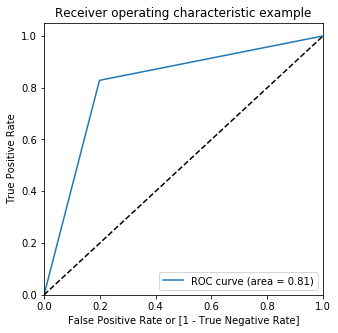

In [157]:
draw_roc(Churn_prediction['Churn'],Churn_prediction['Prediction_LR'])

<b> So we can find the statistics as given below for the PCA output to a Logistic Regression module with TRAIN dataset. <br>
Accuracy - 81.5% <br>
Specificity - 80.14% <br>
Precision or Positive Predictive Rate - 80.66% <br>
Recall or Sensitivity - 83% <br>
AOC - 0.81

#### TEST SET PREPARATION

In [158]:
#Transforming the X_test with the scaler object fit_transformed on train set.
X_test = scaler.transform(X_test)

In [159]:
X_test_df = pd.DataFrame(X_test,columns=full_cols)

In [160]:
X_test_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Recharge_amnt_GoodPhase,date_of_last_rech_6_new,date_of_last_rech_7_new,date_of_last_rech_8_new
0,0.049100,-0.754771,0.760722,-0.707613,-0.714872,-0.563001,-0.917899,-0.866802,-0.618258,-0.248074,-0.224749,-0.270209,-0.283122,-0.288484,-0.361573,-0.352739,-0.385077,-0.254378,-0.658859,-0.620444,-0.146492,-0.324189,0.122655,-0.302829,-0.281729,-0.268829,-0.268446,-0.658937,-0.640687,-0.263255,-0.555045,-0.549851,-0.436286,-0.572233,-0.563484,-0.510462,-0.152567,-0.14181,-0.129544,0.0,0.0,0.0,-0.781304,-0.781648,-0.640519,2.248473,-0.432393,-0.371209,-0.318807,-0.345551,-0.023558,-0.021803,-1.054563,-1.068603,-0.681799,-0.439858,-0.274390,-0.278602,-0.465587,-0.469600,-0.087996,-0.166882,-0.293064,-0.005317,-0.568663,-0.508054,-0.200010,-0.255008,-0.278545,-0.231348,-0.098300,-0.333284,0.018408,-0.171203,-0.161973,-0.158787,-0.232199,-0.408922,-0.115069,-0.505907,-0.392773,-0.136942,1.040833,4.174412,-0.206187,0.394374,1.093427,0.407743,-0.124754,-0.127684,-0.129723,0.199198,-0.532802,0.325913,0.740649,-0.352006,-0.222845,0.027543,-0.463331,0.361217,0.287699,-0.290346,-0.286828,-0.258750,-0.317894,-0.328776,-0.296079,-0.324966,-0.340397,-0.296581,-0.330602,1.023447,-0.364532,-0.305655,-0.314316,-0.271276,-0.196745,-0.207588,-0.164674,-0.930809,-0.307312,-0.323151,-0.307507,-0.377656,0.845948,0.915330,0.637550
1,-1.064945,0.954457,0.487794,-0.719344,-0.629488,-0.592145,-0.918048,-0.745421,-0.612729,-0.248074,-0.224749,-0.270209,-0.283122,-0.288484,-0.361573,-0.377696,-0.186203,-0.258163,-0.669253,-0.370590,-0.201985,-0.324189,-0.183642,-0.302829,0.100489,0.032401,-0.198199,-0.681651,-0.368866,-0.301267,-0.555045,-0.549851,-0.466593,-0.572233,-0.551421,-0.500019,-0.152567,-0.14181,-0.129544,0.0,0.0,0.0,-0.781304,-0.773250,-0.655232,-0.101831,-0.289005,-0.289954,0.227044,-0.345551,-0.023558,-0.021803,-1.111979,-0.944860,-0.745120,-0.396751,-0.323559,-0.301436,-0.704497,-0.568641,-0.430903,-0.248396,-0.237832,-0.041424,-0.724560,-0.590853,-0.453312,-0.255008,-0.278545,-0.156333,-0.281423,-0.294006,-0.160434,-0.171203,-0.161973,-0.158787,-0.360935,-0.378746,-0.215165,-0.796673,-0.687937,-0.497291,-0.361158,-0.099544,-0.206187,-0.177736,-0.183350,-0.154032,-0.124754,-0.127684,-0.129723,-1.1317

In [161]:
X_test_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Recharge_amnt_GoodPhase,date_of_last_rech_6_new,date_of_last_rech_7_new,date_of_last_rech_8_new
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.0,6762.0,6762.0,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,-0.012599,-0.005857,0.303127,-0.083328,-0.048934,0.130159,-0.014682,-0.015044,0.206111,0.001273,-0.063948,-0.129644,-0.055436,-0.094050,-0.180125,0.084534,0.123630,0.188176,0.148864,0.152855,0.307557,0.113177,0.120525,0.151485,-0.013174,-0.042595,-0.022300,0.153982,0.182944,0.319214,-0.123149,-0.093013,0.073724,-0.093315,-0.087349,0.072772,0.065485,0.066091,0.084286,0.0,0.0,0.0,-0.149104,-0.125219,0.100742,-0.008932,-0.065070,-0.057551,0.038274,-0.034342,-0.005300,0.033232,-0.060428,-0.029290,0.269438,0.089509,0.088224,0.162571,0.158667,0.171536,0.302170,0.073388,0.070973,0.122146,0.165940,0.173075,0.

In [162]:
#Tranforming the test with the PCA object
X_test_pca = pca.transform(X_test_df)

#### Logistic Regression prediction on TEST

In [163]:
test_predict_lr = logreg.predict(X_test_pca)

In [164]:
precision_score(y_test,test_predict_lr)

0.17065491183879095

In [165]:
recall_score(y_test,test_predict_lr)

0.716931216931217

In [166]:
accuracy_score(y_test,test_predict_lr)

0.7894114167406093

We can find that the Logistic Regression with PCA even though gave a good performance in train dataset, with test dataset we could get only a recall of 71.7% and accuracy of 79% and precision of 17%. <br>
While the accuracy is more or less the same in both train and test dataset, the recall we are getting has dropped, but more importantly the precision with which we can predict the Churners for high value customers is very less with only 17%. But still we can see a clear precision recall trade off here. But most importantly here our aim is to identify the maximum no of high value customers who will churn. So the bigger aim here is to retain the high value customers keeping in mind even predicting some of the non-churner customers as churn customers is fine as still we won't be loosing out the possible churners.<br>
So the metric in consideration would be Recall score and we can try this metric with different models. <br>
Anyway we can take it forward and try different model fitting in the same dataset and observe the metrics.

### PCA with Decision Tree

We can just try creating a decision tree with max_depth of 5 and observe the classification report. Afterwards we can go with Hyper parameter tuning and building the decision tree.

In [167]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(pca_X,y_smot)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [168]:
y_train_pred_DT = decision_tree.predict(pca_X).astype(int)

In [169]:
decision_tree.score(pca_X,y_smot)

0.7801408923180141

In [170]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Printing classification report
print(classification_report(Churn_prediction['Churn'], y_train_pred_DT))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     14905
           1       0.78      0.78      0.78     14905

    accuracy                           0.78     29810
   macro avg       0.78      0.78      0.78     29810
weighted avg       0.78      0.78      0.78     29810



So the decision tree without hyper parameter tuning and a max_depth of 5 is giving us a precision,recall and accuracy of 78%. We can try tuning for the different hyper parameters and finalise the final model with decision tree.

#### Hyper parameter tuning for Decision Tree

In [171]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [172]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(pca_X,y_smot)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [173]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.811070110701107
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [174]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(pca_X,y_smot)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [175]:
Churn_prediction.head()

,Churn,Prediction_LR
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [176]:
y_train_pred_DT = clf_gini.predict(pca_X)

In [177]:
Churn_prediction['Prediction_DT'] = y_train_pred_DT

In [178]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Churn_prediction['Churn'], Churn_prediction['Prediction_DT']))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     14905
           1       0.83      0.86      0.85     14905

    accuracy                           0.84     29810
   macro avg       0.84      0.84      0.84     29810
weighted avg       0.84      0.84      0.84     29810



In [179]:
precision_score(Churn_prediction['Churn'],Churn_prediction['Prediction_DT'])

0.8310959080934556

In [180]:
recall_score(Churn_prediction['Churn'],Churn_prediction['Prediction_DT'])

0.8639382757463938

In [181]:
accuracy_score(Churn_prediction['Churn'],Churn_prediction['Prediction_DT'])

0.844179805434418

In [182]:
confusion2 = confusion_matrix(Churn_prediction['Churn'],Churn_prediction['Prediction_DT'])

In [183]:
confusion2

array([[12288,  2617],
       [ 2028, 12877]], dtype=int64)

In [184]:
# Predicted     not_churn    churn
# Actual
# not_churn        12288      2617
# churn             2028     12877

In [185]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [186]:
#Sensitivity
TP / float(TP+FN)

0.8639382757463938

In [187]:
#Specificity
TN / float(TN+FP)

0.8244213351224421

In [188]:
#False Positive Rate
FP / float(FP+TN)

0.17557866487755786

In [189]:
#Positive Predictive Value
TP / float(TP+FP)

0.8310959080934556

<b> So we can find the statistics as given below for the PCA output to a Decision tree with optimal parameters with TRAIN dataset. <br>
Accuracy - 84.5% <br>
Specificity - 82.44% <br>
Precision or Positive Predictive Rate - 83.10% <br>
Recall or Sensitivity - 86.39% <br>

We can find that we are getting good metrics especially a better Recall with decision trees on test than the Logistic Regression model. But high chance is there decision trees can overfit for the train data, even though we have tuned for the hyper parameters and making sure it won't overfit. <br>
We can go ahead and evaluate our model in hand with test data.

#### Decision Tree prediction on TEST

In [190]:
test_predict_dt = grid_search.predict(X_test_pca)

In [191]:
precision_score(y_test,test_predict_dt)

0.14127604166666666

In [192]:
recall_score(y_test,test_predict_dt)

0.5740740740740741

In [193]:
accuracy_score(y_test,test_predict_dt)

0.7811298432416445

The above results for the decision trees on test data shows that we have got a accuracy score of just 78% while the recall which is our important metric to be just 57.4% and also the precision to be very low as 14%. In comparison to the Logistic Regression metrics which we obtained, these results are pretty to the lower side and most importantly our metric recall is very low that too with low precision. <br>
Hence we can take it further by building different models.

### PCA with Random Forest

In [194]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

We know that there are many hyper parameters for the Random Forest Classifier. We can start by tuning each hyper parameter seprately and find out the best set of values for each parameter so that we can go ahead and build the final Random forest classifier with these parameters.

#### Tuning the Hyper parameters

##### MAX_DEPTH

In [196]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(pca_X,y_smot)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [197]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.575695,0.016956,0.015021,0.000709,2,{'max_depth': 2},0.774572,0.815498,0.720899,0.758135,0.831600,0.780141,0.039807,4,0.803422,0.811473,0.726937,0.746645,0.829923,0.783680,0.039729
1,1.633330,0.004767,0.019473,0.000784,7,{'max_depth': 7},0.834284,0.845018,0.855082,0.845689,0.845354,0.845086,0.006589,3,0.870765,0.863133,0.869423,0.869758,0.860114,0.866639,0.004228
2,2.385762,0.014092,0.026243,0.000656,12,{'max_depth': 12},0.940624,0.947333,0.926870,0.929889,0.936598,0.936263,0.007356,2,0.985827,0.984988,0.980543,0.976015,0.979705,0.981416,0.003608
3,2.782048,0.014332,0.029099,0.000658,17,{'max_depth': 17},0.949010,0.950352,0.947333,0.950352,0.952030,0.949815,0.001568,1,0.998239,0.997400,0.997736,0.997568,0.997736,0.997736,0.000281


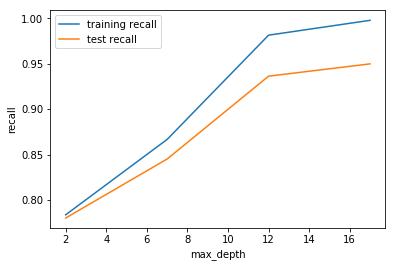

In [198]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()

Observing the above plot between our metric and the max_depth feature, we can go ahead with max_depth of 12, which is showing a good recall metric with not much over fitting.

##### N_ESTIMATORS

In [199]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(pca_X,y_smot)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [200]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.042421,0.084796,0.106862,0.001257,100,{'n_estimators': 100},0.797383,0.818182,0.822878,0.811808,0.828246,0.815699,0.010637,4
1,49.986619,0.202974,0.500407,0.006480,500,{'n_estimators': 500},0.806441,0.817846,0.813821,0.810131,0.830594,0.815767,0.008327,3
2,89.702953,0.478713,0.889473,0.004236,900,{'n_estimators': 900},0.805434,0.818182,0.817511,0.812814,0.828246,0.816437,0.007454,2
3,128.873869,2.109533,1.268282,0.048704,1300,{'n_estimators': 1300},0.807783,0.818853,0.815498,0.812144,0.828246,0.816505,0.006921,1


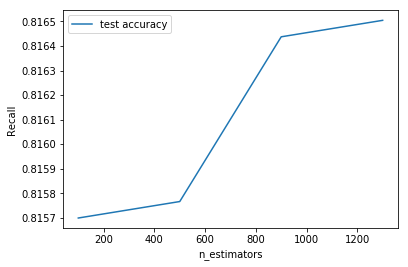

In [201]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()


n_estimators around 800-900 is showing to be a  good value for a good recall metric.

##### MAX_FEATURES

In [202]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}
# instantiate the model
rf = RandomForestClassifier(max_depth=4)
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(pca_X,y_smot)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [203]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.745492,0.009721,0.017167,0.000916,4,{'max_features': 4},0.774908,0.782288,0.806105,0.822543,0.825562,0.802281,0.020573,5,0.801744,0.788158,0.815079,0.817846,0.814743,0.807514,0.011173
1,1.342566,0.010430,0.016265,0.000374,8,{'max_features': 8},0.822207,0.799732,0.800067,0.804764,0.834284,0.812211,0.013754,2,0.839400,0.797970,0.802164,0.805602,0.829420,0.814911,0.016409
2,2.263544,0.016055,0.016832,0.000344,14,{'max_features': 14},0.833613,0.796377,0.833277,0.823885,0.821201,0.821671,0.013581,1,0.849966,0.799480,0.832271,0.835290,0.818266,0.827055,0.017074
3,3.184997,0.024632,0.016996,0.000206,20,{'max_features': 20},0.798390,0.787991,0.818853,0.807112,0.804428,0.803355,0.010160,4,0.817175,0.800654,0.821620,0.815582,0.799732,0.810953,0.009010
4,3.467154,0.384927,0.015171,0.003129,24,{'max_features': 24},0.814492,0.807783,0.812814,0.789668,0.824891,0.809930,0.011560,3,0.830091,0.815247,0.808621,0.796293,0.817427,0.813536,0.011078


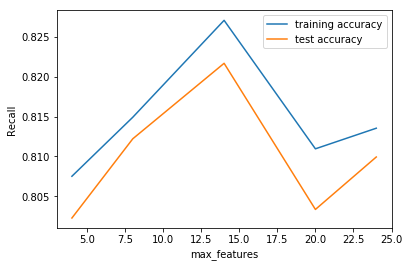

In [204]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()


The plot between Max_features and the recall metric seems to be varying a lot as above with the recall value between the range of 80s. We can choose the max_feature accordingly and try building the model.

##### MIN_SAMPLES_LEAF

In [205]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(pca_X,y_smot)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [206]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.865716,0.026365,0.022117,0.000944,100,{'min_samples_leaf': 100},0.797719,0.824891,0.827239,0.827239,0.825562,0.820530,0.011443,1,0.837806,0.842670,0.838058,0.840574,0.833697,0.838561,0.003014
1,1.729957,0.035024,0.021627,0.000396,150,{'min_samples_leaf': 150},0.801409,0.808118,0.805434,0.803086,0.820195,0.807648,0.006667,2,0.820782,0.815163,0.822627,0.817092,0.821201,0.819373,0.002787
2,1.621430,0.024440,0.021342,0.000570,200,{'min_samples_leaf': 200},0.787655,0.784636,0.798725,0.790674,0.795035,0.791345,0.005043,3,0.808789,0.797635,0.807028,0.804428,0.803254,0.804227,0.003824
3,1.497545,0.032999,0.019132,0.001888,250,{'min_samples_leaf': 250},0.785978,0.776250,0.771553,0.797719,0.804093,0.787118,0.012347,4,0.807950,0.791345,0.785978,0.800738,0.800067,0.797216,0.007701
4,1.431449,0.023021,0.019653,0.000507,300,{'min_samples_leaf': 300},0.749748,0.793358,0.787320,0.798390,0.792687,0.784301,0.017629,5,0.775830,0.796629,0.790507,0.802248,0.791429,0.791328,0.008811


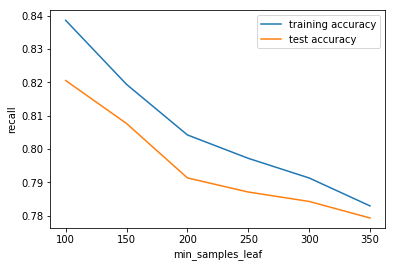

In [207]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("recall")
plt.legend()
plt.show()

The best value for min_samples_leaf seems to be 100.

##### MIN_SAMPLES_SPLIT

In [208]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(pca_X,y_smot)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [209]:
 # scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.485332,0.046902,0.025716,0.002232,200,{'min_samples_split': 200},0.820195,0.843677,0.829587,0.829923,0.850386,0.834753,0.010826,1,0.862798,0.864810,0.857514,0.864307,0.865146,0.862915,0.002817
1,2.413852,0.045799,0.024095,0.000660,250,{'min_samples_split': 250},0.812479,0.832271,0.836632,0.823885,0.826568,0.826367,0.008238,2,0.849966,0.853656,0.853740,0.848457,0.834032,0.847970,0.007268
2,2.311052,0.053711,0.022854,0.001578,300,{'min_samples_split': 300},0.811137,0.818182,0.827239,0.820195,0.833277,0.822006,0.007622,3,0.849379,0.827994,0.850805,0.837135,0.841915,0.841446,0.008370
3,2.213261,0.033097,0.021320,0.002381,350,{'min_samples_split': 350},0.792016,0.806776,0.815163,0.803086,0.817175,0.806843,0.009055,4,0.818433,0.823968,0.827659,0.823968,0.817008,0.822207,0.003929
4,2.167025,0.038479,0.021623,0.000671,400,{'min_samples_split': 400},0.800738,0.808118,0.807447,0.794029,0.817846,0.805636,0.007966,5,0.831097,0.819272,0.830678,0.812898,0.815330,0.821855,0.007651


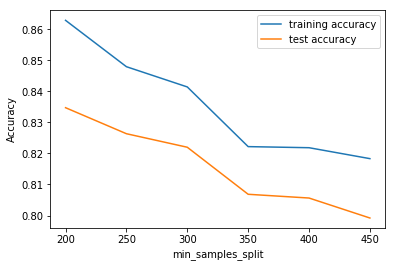

In [210]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The best value for min_samples_split seems to be 200.

Final Random Forest object creation with the tuned hyper parameters found out.

In [211]:
rf = RandomForestClassifier(n_estimators=900,max_depth=12,max_features=20,min_samples_leaf=100,min_samples_split=200)
rf.fit(pca_X,y_smot)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [212]:
y_pred_rf = rf.predict(pca_X)

In [213]:
accuracy_score(y_smot,y_pred_rf)

0.8603488762160348

In [214]:
precision_score(y_smot,y_pred_rf)

0.864828148349409

In [215]:
recall_score(y_smot,y_pred_rf)

0.854209996645421

<b> We can find with the RANDOM FOREST with PCA that we are getting an accuracy of 86% in TEST with the important metric recall as 85.4% and the precision to be 86.5% which seems to be very good values. We can go ahead and fit the model on test dataset.

#### RANDOM FOREST Prediction on TEST

In [216]:
y_pred_rf_test = rf.predict(X_test_pca)

In [217]:
accuracy_score(y_test,y_pred_rf_test)

0.8318544809228039

In [218]:
precision_score(y_test,y_pred_rf_test)

0.19271255060728745

In [219]:
recall_score(y_test,y_pred_rf_test)

0.6296296296296297

In [220]:
confusion3 = confusion_matrix(y_test,y_pred_rf_test)

In [221]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [222]:
TN / float(TN+FP)

0.843828320802005

From the above, we can see our Random Forest model in test. We are getting a good accuracy of 83% while our important metric recall seems to be towards the lower side of 63% with precision to be 19% only. We can see a really lower value of recall here compared to what we were getting with Logistic Regression but slightly better than the decision tree. <br>
We can finally built one more model with xgboost and find out the metrics.

In [223]:
#Importing the libraries for XGBoost.
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [224]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(pca_X,y_smot)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [225]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test_pca)
y_pred[:10]

array([[0.8226546 , 0.17734541],
       [0.81177187, 0.18822816],
       [0.65352976, 0.34647024],
       [0.38840282, 0.6115972 ],
       [0.66214013, 0.33785984],
       [0.08660072, 0.9133993 ],
       [0.97243154, 0.02756849],
       [0.0440796 , 0.9559204 ],
       [0.6039219 , 0.39607808],
       [0.94476086, 0.05523916]], dtype=float32)

In [226]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 82.27%


We just tried running the XGBoost model on our train data with default hyper parameters and we could get the Area under curve value to be 82.27% which is a pretty good value. Now we can try tuning for the paramaters and finally build the model again and try fitting the train and later the test data.

In [227]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
xgb_model = XGBClassifier()
# fit tree on training data
xgb_model1 = GridSearchCV(xgb_model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
xgb_model1.fit(pca_X,y_smot)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(2, 20, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=0)

In [228]:
# cv results
cv_results = pd.DataFrame(xgb_model1.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.557801,0.375833,0.039866,0.008300,2,{'max_depth': 2},0.813150,0.837303,0.837638,0.830594,0.837974,0.831332,0.009494,4,0.842754,0.839064,0.841999,0.840993,0.838393,0.840641,0.001672
1,43.197859,0.520691,0.125888,0.002338,7,{'max_depth': 7},0.965112,0.965448,0.969809,0.979202,0.970144,0.969943,0.005086,3,0.995136,0.995555,0.995639,0.996226,0.995723,0.995656,0.000349
2,73.352051,0.232194,0.225382,0.002358,12,{'max_depth': 12},0.979873,0.979537,0.977524,0.984233,0.983898,0.981013,0.002621,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,88.533480,0.722967,0.258814,0.003176,17,{'max_depth': 17},0.979873,0.976853,0.978866,0.983227,0.982221,0.980208,0.002295,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


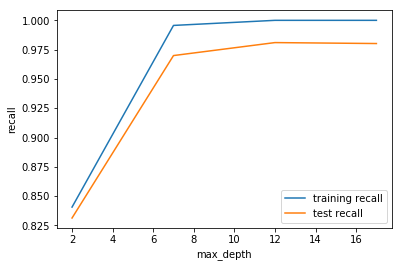

In [229]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training recall")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()

We can find a max_depth of around 6 giving a good recall metric.

In [230]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'n_estimators': range(100, 800, 400)}
# instantiate the model (note we are specifying a max_depth)
xgb_model = XGBClassifier(max_depth=6)
# fit tree on training data
xgb_model1 = GridSearchCV(xgb_model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                return_train_score=True)
xgb_model1.fit(pca_X,y_smot)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=6, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': range(100, 800, 400)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall

In [231]:
# cv results
cv_results = pd.DataFrame(xgb_model1.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,36.590153,0.277952,0.105044,0.000869,100,{'n_estimators': 100},0.934921,0.952700,0.954713,0.963771,0.951359,0.951493,0.009351,2,0.980627,0.985575,0.980292,0.983143,0.982724,0.982472,0.001913
1,176.473652,1.281890,0.580420,0.003821,500,{'n_estimators': 500},0.989601,0.985911,0.988259,0.991278,0.990607,0.989131,0.001905,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


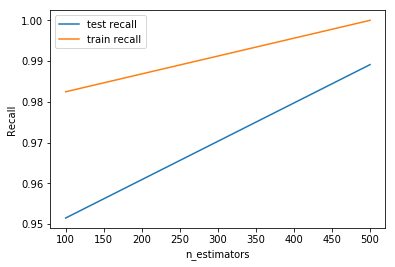

In [232]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(cv_results["param_n_estimators"], 
         cv_results["mean_test_score"], 
         label="test recall")
plt.plot(cv_results["param_n_estimators"], 
         cv_results["mean_train_score"], 
         label="train recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()


n_estimators seems to be better of with 100 since increasing the number of estimators seems to be kind of overfit the train dataset.

Now we can try instnatiating the model object with the above got max_depth and estimators and find out for the learning rate and subsample.

In [233]:
# hyperparameter tuning with XGBoost
# creating a KFold object 
folds = 3
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=6, n_estimators=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds,  
                        verbose = 1,
                        return_train_score=True)      

In [234]:
# fit the model
model_cv.fit(pca_X,y_smot)   

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  7.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=6, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_

In [235]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,17.380847,0.185119,0.166493,0.009706,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.956128,0.969404,0.970813,0.965448,0.006616,5,0.993056,0.993157,0.994767,0.993660,0.000784
1,25.818473,0.056166,0.173271,0.000621,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.966392,0.974638,0.975040,0.972023,0.003986,4,0.997484,0.998189,0.997384,0.997685,0.000358
2,28.976543,0.150894,0.173114,0.000697,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.970215,0.973027,0.979267,0.974170,0.003783,3,0.998591,0.998792,0.999094,0.998826,0.000207
3,17.434149,0.022337,0.174935,0.000633,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.949487,0.960950,0.959340,0.956592,0.005067,6,0.998692,0.999195,0.999497,0.999128,0.000332
4,25.148215,0.094838,0.173933,0.000842,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.975448,0.976449,0.979267,0.977055,0.001617,2,1.000000,1.000000,1.000000,1.000000,0.000000
5,28.384856,0.089874,0.174921,0.001638,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.979674,0.982287,0.985105,0.982355,0.002218,1,1.000000,1.000000,1.000000,1.000000,0.000000


In [236]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,17.380847,0.185119,0.166493,0.009706,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.956128,0.969404,0.970813,0.965448,0.006616,5,0.993056,0.993157,0.994767,0.993660,0.000784
1,25.818473,0.056166,0.173271,0.000621,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.966392,0.974638,0.975040,0.972023,0.003986,4,0.997484,0.998189,0.997384,0.997685,0.000358
2,28.976543,0.150894,0.173114,0.000697,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.970215,0.973027,0.979267,0.974170,0.003783,3,0.998591,0.998792,0.999094,0.998826,0.000207
3,17.434149,0.022337,0.174935,0.000633,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.949487,0.960950,0.959340,0.956592,0.005067,6,0.998692,0.999195,0.999497,0.999128,0.000332
4,25.148215,0.094838,0.173933,0.000842,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.975448,0.976449,0.979267,0.977055,0.001617,2,1.000000,1.000000,1.000000,1.000000,0.000000


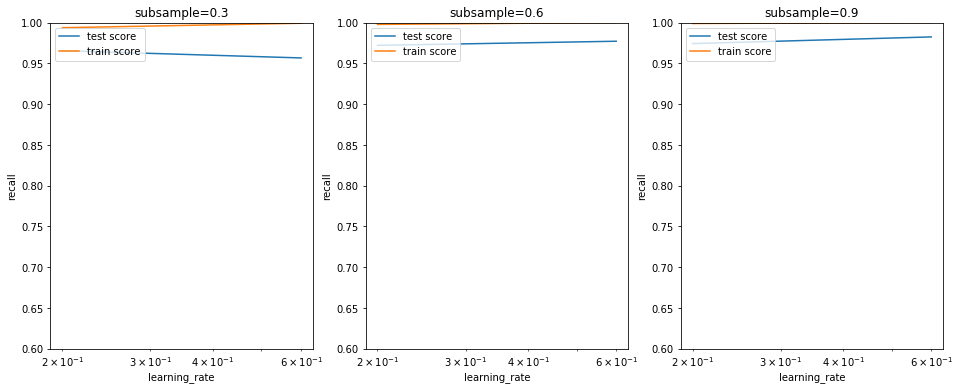

In [237]:
#plotting
plt.figure(figsize=(16,6))
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 
for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('recall')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Learning rate as 0.2 and the subsample to be 0.3 seems to be a good value.

In [238]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 6, 
          'n_estimators':100,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(pca_X,y_smot)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [239]:
# predict
y_pred = model.predict_proba(X_test_pca)
y_pred[:10]

array([[0.8226546 , 0.17734541],
       [0.81177187, 0.18822816],
       [0.65352976, 0.34647024],
       [0.38840282, 0.6115972 ],
       [0.66214013, 0.33785984],
       [0.08660072, 0.9133993 ],
       [0.97243154, 0.02756849],
       [0.0440796 , 0.9559204 ],
       [0.6039219 , 0.39607808],
       [0.94476086, 0.05523916]], dtype=float32)

In [240]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.822735575711766

In [241]:
xgb_df = pd.DataFrame(y_pred[:, 1],columns=["Predicted_probability"])

In [242]:
xgb_df['Churn'] = y_test.values

In [243]:
xgb_df.head(10)

,Predicted_probability,Churn
0,0.177345,0
1,0.188228,0
2,0.346470,0
3,0.611597,0
4,0.337860,0
5,0.913399,0
6,0.027568,0
7,0.955920,0
8,0.396078,0
9,0.055239,0


In [244]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    xgb_df[i]= xgb_df.Predicted_probability.map(lambda x: 1 if x > i else 0)
xgb_df.head()

,Predicted_probability,Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.177345,0,1,1,0,0,0,0,0,0,0,0
1,0.188228,0,1,1,0,0,0,0,0,0,0,0
2,0.346470,0,1,1,1,1,0,0,0,0,0,0
3,0.611597,0,1,1,1,1,1,1,1,0,0,0
4,0.337860,0,1,1,1,1,0,0,0,0,0,0


In [245]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(xgb_df.Churn, xgb_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.055901     1.000000     0.000000
0.1          0.1  0.338066     0.947090     0.302005
0.2          0.2  0.543626     0.894180     0.522870
0.3          0.3  0.667554     0.798942     0.659774
0.4          0.4  0.752884     0.735450     0.753916
0.5          0.5  0.817066     0.685185     0.824875
0.6          0.6  0.863502     0.608466     0.878603
0.7          0.7  0.898551     0.502646     0.921992
0.8          0.8  0.925762     0.383598     0.957863
0.9          0.9  0.942029     0.182540     0.986999


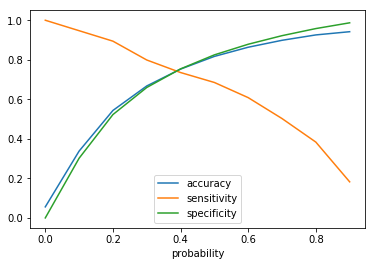

In [246]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

The above plot between the probability and the different metric shows cut-off probability 0.4 to be a good probability that gives a significantly good metrics.

In [247]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df1 = pd.DataFrame( columns = ['probability','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(xgb_df.Churn, xgb_df[i] )
    total1=sum(sum(cm1))
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    rec = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,prec, rec]
print(cutoff_df1)

     probability  precision    recall
0.0          0.0   0.055901  1.000000
0.1          0.1   0.074366  0.947090
0.2          0.2   0.099882  0.894180
0.3          0.3   0.122070  0.798942
0.4          0.4   0.150352  0.735450
0.5          0.5   0.188090  0.685185
0.6          0.6   0.228856  0.608466
0.7          0.7   0.276163  0.502646
0.8          0.8   0.350242  0.383598
0.9          0.9   0.453947  0.182540


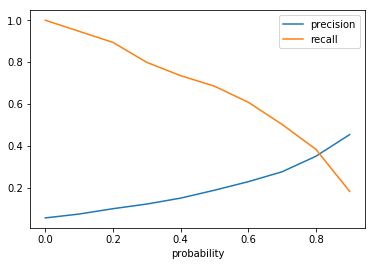

In [248]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df1.plot.line(x='probability', y=['precision','recall'])
plt.show()

From the above plot between the probability and the metrics - precision and recall, we can clearly see a tradeoff between the two values. Keeping in mind, recall to be our important metric, we can opt for a cut-off probability that gives a significantly good recall values with compromise on precision.

In [249]:
#Selecting the cut-off probability as 0.4 and predicting for Churn.
xgb_df['Final_predicted'] = xgb_df.Predicted_probability.map( lambda x: 1 if x > 0.4 else 0)
xgb_df.head()

,Predicted_probability,Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0.177345,0,1,1,0,0,0,0,0,0,0,0,0
1,0.188228,0,1,1,0,0,0,0,0,0,0,0,0
2,0.346470,0,1,1,1,1,0,0,0,0,0,0,0
3,0.611597,0,1,1,1,1,1,1,1,0,0,0,1
4,0.337860,0,1,1,1,1,0,0,0,0,0,0,0


In [250]:
from sklearn.metrics import accuracy_score

In [251]:
# Let's check the overall accuracy.
accuracy_score(xgb_df.Churn, xgb_df.Final_predicted)

0.7528837622005324

In [252]:
# Let's check the overall accuracy.
precision_score(xgb_df.Churn, xgb_df.Final_predicted)

0.1503515413737155

In [253]:
recall_score(xgb_df.Churn, xgb_df.Final_predicted)

0.7354497354497355

In [254]:
confusion2 = confusion_matrix(xgb_df.Churn, xgb_df.Final_predicted)
confusion2

array([[4813, 1571],
       [ 100,  278]], dtype=int64)

In [255]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [256]:
#Sensitivity
TP / float(TP+FN)

0.7354497354497355

In [257]:
#Specificity
TN / float(TN+FP)

0.7539160401002506

In [258]:
#False Positive Rate
FP / float(FP+TN)

0.24608395989974938

In [259]:
#Positive Predictive Value
TP / float(TP+FP)

0.1503515413737155

In [260]:
#Negative Predictive Value
TN / float(TN+FN)

0.9796458375737839

From the above metrics, we can see that for the XGBOOST model with PCA we are getting a accuracy of 75% with our important metric Recall of 73.5% while precision being again low - 15%. We can see a clear trade off between both the precision - recall here as well. 

<b> Out of all the models we tried fitting so far, in the train dataset, the so far better model which we got in terms of recall would be Logistic Regression model and the XGBoost model. When we got a recall of 71.7% and accuracy of 79% for our Logistic Regression model, we got around 73.5% recall and accuracy of 75%, whereas the precision stays low for both the models. Both the models seems to be in comparable range performance. We can opt for Logistic Regression model here,sighting the simplicity and the computational power it needs compared to the XGBoost model. Also,further the overhead in tuning the hyper parameters for Boosting techniques is one not required in our Logistic Regression model. <br> Hence we can opt for the Logistic Regression model with PCA here.

#### Logistic Regression without PCA

We can take our train datasets before applying the PCA and try running the Logistic Regression to find out the feature importance and important features in deciding the Churn case for our high value customers.

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [270]:
logreg = LogisticRegression()
rfe = RFE(logreg,20)
rfe = rfe.fit(X_smot,y_smot)

In [272]:
cols = X_smot.columns[rfe.support_]
cols

Index(['arpu_7', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_mou_7', 'std_og_mou_8', 'og_others_8', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'total_ic_mou_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'aon',
       'date_of_last_rech_8_new'],
      dtype='object')

In [273]:
rfe_columns = ['arpu_7', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8','loc_og_t2m_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8','std_og_mou_7', 'std_og_mou_8', 'og_others_8', 'total_og_mou_7','total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'total_ic_mou_8','total_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'aon','date_of_last_rech_8_new']

In [274]:
#Importing the statsmodels Library
import statsmodels.api as sm 

In [275]:
X_train_rfe = X_smot[rfe_columns]

In [276]:
X_train_rfe.head()

,arpu_7,offnet_mou_7,offnet_mou_8,roam_og_mou_8,loc_og_t2m_mou_8,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_7,std_og_mou_8,og_others_8,total_og_mou_7,total_og_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_7,total_ic_mou_8,total_rech_amt_8,last_day_rch_amt_8,monthly_2g_8,aon,date_of_last_rech_8_new
0,1.004967,0.311339,-0.022928,-0.361573,-0.546310,0.674105,0.365082,0.116279,-0.069103,-0.021803,-0.169810,-0.318457,-0.543232,-0.556932,-0.542670,0.543713,-0.787449,2.963878,-0.718095,0.071370
1,-0.338627,0.260251,0.299393,-0.361573,1.421557,-0.563484,-0.445973,-0.771815,-0.620343,-0.021803,0.432491,1.036944,0.626619,0.621214,0.351883,-0.481713,0.610243,-0.296581,1.749169,-0.117356
2,-0.276933,-0.171582,0.287136,-0.361573,1.261559,-0.561754,-0.480160,-0.780443,-0.641395,-0.021803,-0.556121,-0.111740,0.851104,0.937816,0.700553,0.577667,0.610243,-0.296581,-0.129807,-0.872263
3,0.270998,-0.688775,0.657065,-0.361573,-0.393440,-0.361207,1.106519,0.790888,2.897918,-0.021803,0.428388,2.416315,-0.162096,-0.459357,-0.021108,1.847565,-0.249875,-0.296581,1.409047,0.826277
4,1.563893,0.916468,0.727291,-0.361573,1.346094,-0.113500,0.041979,-0.118323,-0.038519,-0.021803,1.084636,0.747030,1.713632,3.708031,1.504452,1.399366,0.610243,-0.296581,1.750276,0.826277


In [277]:
model1 = sm.GLM(y_smot,(sm.add_constant(X_train_rfe)),family=sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29810
Model:                            GLM   Df Residuals:                    29789
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12500.
Date:                Mon, 04 Nov 2019   Deviance:                       24999.
Time:                        23:07:51   Pearson chi2:                 5.02e+04
No. Iterations:                    10   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1492      0.019     -8.008      0.000      -0.186      -0.113
arpu_7                      0.4234      0.026     16.218      0.000       0.372       0.475
offnet_mou_7               -0.4861      0.105     -4.645      0.000      -0.691      -0.281
offnet_mou_8               -1.7408      0.214     -8.117      0.000      -2.161      -1.320
roam_og_mou_8               1.0392      0.051     20.226      0.000       0.938       1.140
loc_og_t2m_mou_8            1.0083      0.120      8.381      0.000       0.773       1.244
std_og_t2m_mou_7            0.4633      0.105      4.395      0.000       0.257       0.670
std_og_t2m_mou_8            1.5158      0.188      8.064      0.000       1.147       1.884
std_og_mou_7               -0.4661      0.123     -3.792      0.000      -0.707      -0.225
std_og_mou_8                1.0754      0.137      7.840      0.000       0.807       1.344
og_others_8                -0.4592      0.302     -1.519      0.129      -1.052       0.133
total_og_mou_7              0.6598      0.116      5.684      0.000       0.432       0.887
total_og_mou_8             -1.5367      0.145    -10.603      0.000      -1.821      -1.253
loc_ic_t2m_mou_8           -0.3753      0.051     -7.379      0.000      -0.475      -0.276
loc_ic_mou_7                0.3686      0.036     10.336      0.000       0.299       0.439
total_ic_mou_8             -0.7089      0.047    -14.944      0.000      -0.802      -0.616
total_rech_amt_8           -0.3263      0.033     -9.890      0.000      -0.391      -0.262
last_day_rch_amt_8         -0.6566      0.023    -28.363      0.000      -0.702      -0.611
monthly_2g_8               -0.3395      0.020    -16.848      0.000      -0.379      -0.300
aon                        -0.3575      0.018    -20.012      0.000      -0.392      -0.322
date_of_last_rech_8_new    -0.9866      0.022    -45.134      0.000      -1.029      -0.944
===========================================================================================
"""

In [278]:
X_train_rfe.drop(['og_others_8'],axis=1,inplace=True)

In [280]:
model2 = sm.GLM(y_smot,(sm.add_constant(X_train_rfe)),family=sm.families.Binomial())
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29810
Model:                            GLM   Df Residuals:                    29790
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12505.
Date:                Mon, 04 Nov 2019   Deviance:                       25011.
Time:                        23:08:35   Pearson chi2:                 5.03e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1413      0.018     -8.000      0.000      -0.176      -0.107
arpu_7                      0.4224      0.026     16.206      0.000       0.371       0.474
offnet_mou_7               -0.4892      0.105     -4.677      0.000      -0.694      -0.284
offnet_mou_8               -1.7445      0.215     -8.132      0.000      -2.165      -1.324
roam_og_mou_8               1.0413      0.051     20.258      0.000       0.941       1.142
loc_og_t2m_mou_8            1.0128      0.120      8.416      0.000       0.777       1.249
std_og_t2m_mou_7            0.4665      0.105      4.427      0.000       0.260       0.673
std_og_t2m_mou_8            1.5190      0.188      8.079      0.000       1.150       1.887
std_og_mou_7               -0.4720      0.123     -3.842      0.000      -0.713      -0.231
std_og_mou_8                1.0840      0.137      7.903      0.000       0.815       1.353
total_og_mou_7              0.6663      0.116      5.744      0.000       0.439       0.894
total_og_mou_8             -1.5459      0.145    -10.667      0.000      -1.830      -1.262
loc_ic_t2m_mou_8           -0.3749      0.051     -7.376      0.000      -0.475      -0.275
loc_ic_mou_7                0.3692      0.036     10.353      0.000       0.299       0.439
total_ic_mou_8             -0.7093      0.047    -14.959      0.000      -0.802      -0.616
total_rech_amt_8           -0.3267      0.033     -9.912      0.000      -0.391      -0.262
last_day_rch_amt_8         -0.6554      0.023    -28.340      0.000      -0.701      -0.610
monthly_2g_8               -0.3389      0.020    -16.824      0.000      -0.378      -0.299
aon                        -0.3582      0.018    -20.062      0.000      -0.393      -0.323
date_of_last_rech_8_new    -0.9856      0.022    -45.122      0.000      -1.028      -0.943
===========================================================================================
"""

In [281]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [282]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,offnet_mou_8,81.53
6,std_og_t2m_mou_8,62.92
7,std_og_mou_7,34.16
9,total_og_mou_7,29.50
10,total_og_mou_8,28.94
8,std_og_mou_8,28.48
5,std_og_t2m_mou_7,26.99
1,offnet_mou_7,26.03
4,loc_og_t2m_mou_8,25.94
3,roam_og_mou_8,4.38


In [283]:
X_train_rfe.drop(['offnet_mou_8'],axis=1,inplace=True)

In [284]:
model3 = sm.GLM(y_smot,(sm.add_constant(X_train_rfe)),family=sm.families.Binomial())
model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29810
Model:                            GLM   Df Residuals:                    29791
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12540.
Date:                Mon, 04 Nov 2019   Deviance:                       25079.
Time:                        23:09:29   Pearson chi2:                 6.06e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1475      0.018     -8.360      0.000      -0.182      -0.113
arpu_7                      0.4268      0.026     16.531      0.000       0.376       0.477
offnet_mou_7               -0.7467      0.101     -7.414      0.000      -0.944      -0.549
roam_og_mou_8               0.7209      0.029     25.002      0.000       0.664       0.777
loc_og_t2m_mou_8            0.2053      0.067      3.054      0.002       0.074       0.337
std_og_t2m_mou_7            0.6741      0.103      6.523      0.000       0.472       0.877
std_og_t2m_mou_8            0.0210      0.038      0.558      0.577      -0.053       0.095
std_og_mou_7               -0.6841      0.122     -5.607      0.000      -0.923      -0.445
std_og_mou_8                1.3540      0.137      9.905      0.000       1.086       1.622
total_og_mou_7              0.8987      0.114      7.872      0.000       0.675       1.122
total_og_mou_8             -1.8365      0.144    -12.713      0.000      -2.120      -1.553
loc_ic_t2m_mou_8           -0.3752      0.051     -7.358      0.000      -0.475      -0.275
loc_ic_mou_7                0.3759      0.036     10.486      0.000       0.306       0.446
total_ic_mou_8             -0.7243      0.048    -15.211      0.000      -0.818      -0.631
total_rech_amt_8           -0.3526      0.033    -10.795      0.000      -0.417      -0.289
last_day_rch_amt_8         -0.6578      0.023    -28.452      0.000      -0.703      -0.613
monthly_2g_8               -0.3403      0.020    -16.881      0.000      -0.380      -0.301
aon                        -0.3555      0.018    -19.960      0.000      -0.390      -0.321
date_of_last_rech_8_new    -0.9806      0.022    -44.976      0.000      -1.023      -0.938
===========================================================================================
"""

In [285]:
X_train_rfe.drop(['std_og_t2m_mou_8'],axis=1,inplace=True)

In [286]:
model4 = sm.GLM(y_smot,(sm.add_constant(X_train_rfe)),family=sm.families.Binomial())
model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29810
Model:                            GLM   Df Residuals:                    29792
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12540.
Date:                Mon, 04 Nov 2019   Deviance:                       25079.
Time:                        23:10:21   Pearson chi2:                 6.09e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1475      0.018     -8.360      0.000      -0.182      -0.113
arpu_7                      0.4264      0.026     16.524      0.000       0.376       0.477
offnet_mou_7               -0.7469      0.101     -7.414      0.000      -0.944      -0.549
roam_og_mou_8               0.7210      0.029     25.007      0.000       0.665       0.778
loc_og_t2m_mou_8            0.2055      0.067      3.056      0.002       0.074       0.337
std_og_t2m_mou_7            0.6934      0.097      7.120      0.000       0.503       0.884
std_og_mou_7               -0.6985      0.119     -5.861      0.000      -0.932      -0.465
std_og_mou_8                1.3704      0.133     10.266      0.000       1.109       1.632
total_og_mou_7              0.8993      0.114      7.876      0.000       0.676       1.123
total_og_mou_8             -1.8374      0.144    -12.717      0.000      -2.121      -1.554
loc_ic_t2m_mou_8           -0.3748      0.051     -7.352      0.000      -0.475      -0.275
loc_ic_mou_7                0.3755      0.036     10.477      0.000       0.305       0.446
total_ic_mou_8             -0.7241      0.048    -15.207      0.000      -0.817      -0.631
total_rech_amt_8           -0.3523      0.033    -10.787      0.000      -0.416      -0.288
last_day_rch_amt_8         -0.6579      0.023    -28.455      0.000      -0.703      -0.613
monthly_2g_8               -0.3406      0.020    -16.896      0.000      -0.380      -0.301
aon                        -0.3556      0.018    -19.969      0.000      -0.391      -0.321
date_of_last_rech_8_new    -0.9806      0.022    -44.979      0.000      -1.023      -0.938
===========================================================================================
"""

In [287]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,std_og_mou_7,32.18
7,total_og_mou_7,28.61
8,total_og_mou_8,28.04
6,std_og_mou_8,25.19
1,offnet_mou_7,24.57
4,std_og_t2m_mou_7,23.74
3,loc_og_t2m_mou_8,7.00
11,total_ic_mou_8,3.85
12,total_rech_amt_8,3.74
9,loc_ic_t2m_mou_8,3.25


In [288]:
X_train_rfe.drop(['std_og_mou_7'],axis=1,inplace=True)

In [289]:
model5 = sm.GLM(y_smot,(sm.add_constant(X_train_rfe)),family=sm.families.Binomial())
model5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29810
Model:                            GLM   Df Residuals:                    29793
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12557.
Date:                Mon, 04 Nov 2019   Deviance:                       25114.
Time:                        23:11:03   Pearson chi2:                 5.76e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1342      0.017     -7.697      0.000      -0.168      -0.100
arpu_7                      0.4125      0.026     15.959      0.000       0.362       0.463
offnet_mou_7               -0.3264      0.071     -4.609      0.000      -0.465      -0.188
roam_og_mou_8               0.6868      0.028     24.373      0.000       0.632       0.742
loc_og_t2m_mou_8           -0.0063      0.056     -0.114      0.909      -0.116       0.103
std_og_t2m_mou_7            0.2789      0.067      4.157      0.000       0.147       0.410
std_og_mou_8                0.7371      0.073     10.033      0.000       0.593       0.881
total_og_mou_7              0.2674      0.038      7.078      0.000       0.193       0.341
total_og_mou_8             -1.1849      0.087    -13.652      0.000      -1.355      -1.015
loc_ic_t2m_mou_8           -0.3805      0.051     -7.518      0.000      -0.480      -0.281
loc_ic_mou_7                0.4153      0.035     11.910      0.000       0.347       0.484
total_ic_mou_8             -0.7553      0.047    -15.932      0.000      -0.848      -0.662
total_rech_amt_8           -0.3523      0.033    -10.795      0.000      -0.416      -0.288
last_day_rch_amt_8         -0.6560      0.023    -28.416      0.000      -0.701      -0.611
monthly_2g_8               -0.3366      0.020    -16.776      0.000      -0.376      -0.297
aon                        -0.3579      0.018    -20.134      0.000      -0.393      -0.323
date_of_last_rech_8_new    -0.9799      0.022    -45.059      0.000      -1.023      -0.937
===========================================================================================
"""

In [290]:
X_train_rfe.drop(['loc_og_t2m_mou_8'],axis=1,inplace=True)

In [291]:
model6 = sm.GLM(y_smot,(sm.add_constant(X_train_rfe)),family=sm.families.Binomial())
model6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29810
Model:                            GLM   Df Residuals:                    29794
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12557.
Date:                Mon, 04 Nov 2019   Deviance:                       25114.
Time:                        23:11:36   Pearson chi2:                 5.76e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1341      0.017     -7.709      0.000      -0.168      -0.100
arpu_7                      0.4129      0.026     16.102      0.000       0.363       0.463
offnet_mou_7               -0.3308      0.059     -5.618      0.000      -0.446      -0.215
roam_og_mou_8               0.6873      0.028     24.719      0.000       0.633       0.742
std_og_t2m_mou_7            0.2828      0.058      4.885      0.000       0.169       0.396
std_og_mou_8                0.7421      0.059     12.571      0.000       0.626       0.858
total_og_mou_7              0.2680      0.037      7.159      0.000       0.195       0.341
total_og_mou_8             -1.1907      0.070    -16.918      0.000      -1.329      -1.053
loc_ic_t2m_mou_8           -0.3822      0.048     -7.906      0.000      -0.477      -0.287
loc_ic_mou_7                0.4158      0.035     12.014      0.000       0.348       0.484
total_ic_mou_8             -0.7549      0.047    -15.967      0.000      -0.848      -0.662
total_rech_amt_8           -0.3528      0.032    -10.941      0.000      -0.416      -0.290
last_day_rch_amt_8         -0.6560      0.023    -28.416      0.000      -0.701      -0.611
monthly_2g_8               -0.3366      0.020    -16.778      0.000      -0.376      -0.297
aon                        -0.3579      0.018    -20.144      0.000      -0.393      -0.323
date_of_last_rech_8_new    -0.9800      0.022    -45.076      0.000      -1.023      -0.937
===========================================================================================
"""

In [292]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_og_mou_8,8.99
3,std_og_t2m_mou_7,8.53
1,offnet_mou_7,8.50
4,std_og_mou_8,6.41
5,total_og_mou_7,4.08
9,total_ic_mou_8,3.82
10,total_rech_amt_8,3.61
7,loc_ic_t2m_mou_8,3.03
8,loc_ic_mou_7,2.67
0,arpu_7,2.28


In [293]:
X_train_rfe.drop(['total_og_mou_8'],axis=1,inplace=True)

In [294]:
model7 = sm.GLM(y_smot,(sm.add_constant(X_train_rfe)),family=sm.families.Binomial())
model7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29810
Model:                            GLM   Df Residuals:                    29795
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12725.
Date:                Mon, 04 Nov 2019   Deviance:                       25451.
Time:                        23:12:17   Pearson chi2:                 6.39e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1218      0.017     -7.084      0.000      -0.155      -0.088
arpu_7                      0.5537      0.025     22.199      0.000       0.505       0.603
offnet_mou_7               -0.6625      0.050    -13.199      0.000      -0.761      -0.564
roam_og_mou_8               0.8328      0.027     30.419      0.000       0.779       0.886
std_og_t2m_mou_7            0.6752      0.049     13.824      0.000       0.579       0.771
std_og_mou_8               -0.0644      0.029     -2.210      0.027      -0.122      -0.007
total_og_mou_7             -0.0257      0.031     -0.817      0.414      -0.087       0.036
loc_ic_t2m_mou_8           -0.4661      0.049     -9.434      0.000      -0.563      -0.369
loc_ic_mou_7                0.4651      0.035     13.434      0.000       0.397       0.533
total_ic_mou_8             -0.9069      0.048    -18.833      0.000      -1.001      -0.813
total_rech_amt_8           -0.6146      0.029    -20.953      0.000      -0.672      -0.557
last_day_rch_amt_8         -0.6592      0.023    -28.368      0.000      -0.705      -0.614
monthly_2g_8               -0.3270      0.020    -16.228      0.000      -0.366      -0.287
aon                        -0.3763      0.018    -21.281      0.000      -0.411      -0.342
date_of_last_rech_8_new    -0.9742      0.022    -45.236      0.000      -1.016      -0.932
===========================================================================================
"""

In [295]:
X_train_rfe.drop(['total_og_mou_7'],axis=1,inplace=True)

In [296]:
model8 = sm.GLM(y_smot,(sm.add_constant(X_train_rfe)),family=sm.families.Binomial())
model8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29810
Model:                            GLM   Df Residuals:                    29796
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12726.
Date:                Mon, 04 Nov 2019   Deviance:                       25451.
Time:                        23:12:47   Pearson chi2:                 6.40e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1205      0.017     -7.042      0.000      -0.154      -0.087
arpu_7                      0.5447      0.022     24.444      0.000       0.501       0.588
offnet_mou_7               -0.6750      0.048    -14.121      0.000      -0.769      -0.581
roam_og_mou_8               0.8320      0.027     30.447      0.000       0.778       0.886
std_og_t2m_mou_7            0.6802      0.048     14.034      0.000       0.585       0.775
std_og_mou_8               -0.0785      0.023     -3.344      0.001      -0.125      -0.033
loc_ic_t2m_mou_8           -0.4634      0.049     -9.401      0.000      -0.560      -0.367
loc_ic_mou_7                0.4617      0.034     13.441      0.000       0.394       0.529
total_ic_mou_8             -0.9062      0.048    -18.816      0.000      -1.001      -0.812
total_rech_amt_8           -0.6095      0.029    -21.308      0.000      -0.666      -0.553
last_day_rch_amt_8         -0.6572      0.023    -28.453      0.000      -0.703      -0.612
monthly_2g_8               -0.3265      0.020    -16.214      0.000      -0.366      -0.287
aon                        -0.3758      0.018    -21.276      0.000      -0.410      -0.341
date_of_last_rech_8_new    -0.9736      0.022    -45.242      0.000      -1.016      -0.931
===========================================================================================
"""

In [297]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_t2m_mou_7,6.95
1,offnet_mou_7,6.72
7,total_ic_mou_8,3.75
5,loc_ic_t2m_mou_8,3.02
8,total_rech_amt_8,2.75
6,loc_ic_mou_7,2.64
4,std_og_mou_8,2.14
0,arpu_7,1.68
9,last_day_rch_amt_8,1.40
12,date_of_last_rech_8_new,1.29


In [298]:
X_train_rfe.drop(['std_og_t2m_mou_7'],axis=1,inplace=True)

In [299]:
model9 = sm.GLM(y_smot,(sm.add_constant(X_train_rfe)),family=sm.families.Binomial())
model9.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29810
Model:                            GLM   Df Residuals:                    29797
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12823.
Date:                Mon, 04 Nov 2019   Deviance:                       25646.
Time:                        23:13:44   Pearson chi2:                 6.40e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1225      0.017     -7.153      0.000      -0.156      -0.089
arpu_7                      0.4975      0.022     22.754      0.000       0.455       0.540
offnet_mou_7               -0.0586      0.020     -2.963      0.003      -0.097      -0.020
roam_og_mou_8               0.8291      0.028     30.077      0.000       0.775       0.883
std_og_mou_8                0.0414      0.022      1.920      0.055      -0.001       0.084
loc_ic_t2m_mou_8           -0.6366      0.049    -12.982      0.000      -0.733      -0.541
loc_ic_mou_7                0.4065      0.034     11.874      0.000       0.339       0.474
total_ic_mou_8             -0.8405      0.048    -17.662      0.000      -0.934      -0.747
total_rech_amt_8           -0.6702      0.028    -23.725      0.000      -0.726      -0.615
last_day_rch_amt_8         -0.6465      0.023    -28.002      0.000      -0.692      -0.601
monthly_2g_8               -0.3057      0.020    -15.343      0.000      -0.345      -0.267
aon                        -0.4009      0.018    -22.827      0.000      -0.435      -0.366
date_of_last_rech_8_new    -0.9497      0.021    -44.359      0.000      -0.992      -0.908
===========================================================================================
"""

In [301]:
X_train_rfe.drop(['std_og_mou_8'],axis=1,inplace=True)

In [302]:
model10 = sm.GLM(y_smot,(sm.add_constant(X_train_rfe)),family=sm.families.Binomial())
result = model10.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29810
Model:                            GLM   Df Residuals:                    29798
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12825.
Date:                Mon, 04 Nov 2019   Deviance:                       25650.
Time:                        23:15:01   Pearson chi2:                 6.34e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1221      0.017     -7.137      0.000      -0.156      -0.089
arpu_7                      0.4950      0.022     22.709      0.000       0.452       0.538
offnet_mou_7               -0.0462      0.019     -2.467      0.014      -0.083      -0.009
roam_og_mou_8               0.8146      0.026     30.814      0.000       0.763       0.866
loc_ic_t2m_mou_8           -0.6517      0.048    -13.439      0.000      -0.747      -0.557
loc_ic_mou_7                0.4003      0.034     11.748      0.000       0.334       0.467
total_ic_mou_8             -0.8405      0.048    -17.659      0.000      -0.934      -0.747
total_rech_amt_8           -0.6405      0.024    -27.223      0.000      -0.687      -0.594
last_day_rch_amt_8         -0.6517      0.023    -28.468      0.000      -0.697      -0.607
monthly_2g_8               -0.3118      0.020    -15.845      0.000      -0.350      -0.273
aon                        -0.4038      0.017    -23.094      0.000      -0.438      -0.370
date_of_last_rech_8_new    -0.9498      0.021    -44.390      0.000      -0.992      -0.908
===========================================================================================
"""

In [303]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_ic_mou_8,3.71
3,loc_ic_t2m_mou_8,2.88
4,loc_ic_mou_7,2.54
6,total_rech_amt_8,1.93
0,arpu_7,1.65
7,last_day_rch_amt_8,1.36
1,offnet_mou_7,1.35
10,date_of_last_rech_8_new,1.28
2,roam_og_mou_8,1.09
9,aon,1.09


In [304]:
y_train_pred = result.predict(sm.add_constant(X_train_rfe)).values.reshape(-1)

In [305]:
y_train_pred[:10]

array([0.52906647, 0.16203011, 0.24823169, 0.06958606, 0.03645005,
       0.98830144, 0.60756808, 0.01020968, 0.23750492, 0.3638423 ])

In [306]:
y_df = y_smot.copy()

In [307]:
y_df['Converted_Prob'] = y_train_pred

In [308]:
y_df.head()

,Churn,Converted_Prob
0,0,0.529066
1,0,0.162030
2,0,0.248232
3,0,0.069586
4,0,0.036450


In [309]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_df[i]= y_df.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_df.head()

,Churn,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.529066,1,1,1,1,1,1,0,0,0,0
1,0,0.162030,1,1,0,0,0,0,0,0,0,0
2,0,0.248232,1,1,1,0,0,0,0,0,0,0
3,0,0.069586,1,0,0,0,0,0,0,0,0,0
4,0,0.036450,1,0,0,0,0,0,0,0,0,0


In [310]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_df.Churn, y_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.654445     0.980141     0.328749
0.2          0.2  0.728279     0.953304     0.503254
0.3          0.3  0.775411     0.920496     0.630325
0.4          0.4  0.808856     0.886011     0.731701
0.5          0.5  0.824187     0.833277     0.815096
0.6          0.6  0.816203     0.759544     0.872861
0.7          0.7  0.781986     0.649514     0.914458
0.8          0.8  0.724690     0.501711     0.947669
0.9          0.9  0.620396     0.264743     0.976048


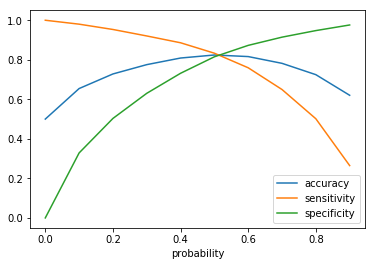

In [311]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [312]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df1 = pd.DataFrame( columns = ['probability','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_df.Churn, y_df[i] )
    total1=sum(sum(cm1))
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    rec = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,prec, rec]
print(cutoff_df1)

     probability  precision    recall
0.0          0.0   0.500000  1.000000
0.1          0.1   0.593524  0.980141
0.2          0.2   0.657428  0.953304
0.3          0.3   0.713469  0.920496
0.4          0.4   0.767568  0.886011
0.5          0.5   0.818397  0.833277
0.6          0.6   0.856613  0.759544
0.7          0.7   0.883625  0.649514
0.8          0.8   0.905546  0.501711
0.9          0.9   0.917035  0.264743


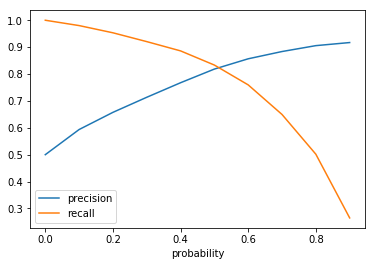

In [313]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df1.plot.line(x='probability', y=['precision','recall'])
plt.show()

In [314]:
y_df['Final_predicted'] = y_df.Converted_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_df.head()

,Churn,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.529066,1,1,1,1,1,1,0,0,0,0,1
1,0,0.162030,1,1,0,0,0,0,0,0,0,0,0
2,0,0.248232,1,1,1,0,0,0,0,0,0,0,0
3,0,0.069586,1,0,0,0,0,0,0,0,0,0,0
4,0,0.036450,1,0,0,0,0,0,0,0,0,0,0


In [315]:
final_confusion = confusion_matrix(y_df['Churn'],y_df['Final_predicted'])
print(final_confusion)

[[12149  2756]
 [ 2485 12420]]


In [316]:
# Predicted     not_churn    churn
# Actual
# not_churn        12149        2756
# churn             2485       12420

In [317]:
TP = final_confusion[1,1] # true positive 
TN = final_confusion[0,0] # true negatives
FP = final_confusion[0,1] # false positives
FN = final_confusion[1,0] # false negatives

In [318]:
#Sensitivity
TP / float(TP+FN)

0.8332774236833277

In [319]:
#Specificity
TN / float(TN+FP)

0.8150956055015096

In [320]:
#False Positive Rate
FP / float(FP+TN)

0.18490439449849044

In [321]:
#Positive Predictive Value
TP / float(TP+FP)

0.8183974696889826

In [322]:
#Negative Predictive Value
TN / float(TN+FN)

0.8301899685663523

In [323]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [324]:
precision_score(y_df['Churn'],y_df['Final_predicted'])

0.8183974696889826

In [325]:
recall_score(y_df['Churn'],y_df['Final_predicted'])

0.8332774236833277

In [326]:
from sklearn.metrics import precision_recall_curve

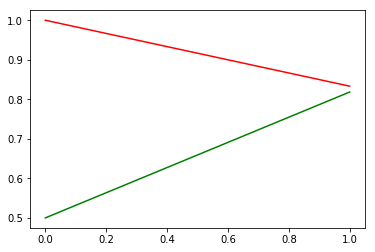

In [327]:
p, r, thresholds = precision_recall_curve(y_df['Churn'],y_df['Final_predicted'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [328]:
cols = list(X_train_rfe.columns)

In [343]:
X_train_rfe.shape

(29810, 11)

In [357]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                29810
Model:                            GLM   Df Residuals:                    29798
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12825.
Date:                Mon, 04 Nov 2019   Deviance:                       25650.
Time:                        23:35:38   Pearson chi2:                 6.34e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1221      0.017     -7.137      0.000      -0.156      -0.089
arpu_7       

In [350]:
coeff = pd.DataFrame()
coeff['Feature'] = X_train_rfe.columns

In [355]:
coeff['Coefficient_Estimate'] = pd.Series([0.4950,-0.0462,0.8146,-0.6517,0.4003,-0.8405,-0.6405,-0.6517,-0.3118,-0.4038,-0.9498])

In [358]:
coeff = coeff.sort_values(by='Coefficient_Estimate',ascending= False)
coeff

,Feature,Coefficient_Estimate
2,roam_og_mou_8,0.8146
0,arpu_7,0.4950
4,loc_ic_mou_7,0.4003
1,offnet_mou_7,-0.0462
8,monthly_2g_8,-0.3118
9,aon,-0.4038
6,total_rech_amt_8,-0.6405
3,loc_ic_t2m_mou_8,-0.6517
7,last_day_rch_amt_8,-0.6517
5,total_ic_mou_8,-0.8405


<b> We can see the important features that predicts the Churn of High value customers to be features such as - <br>
roam_og_mou_8<br>
arpu_7<br>
loc_ic_mou_7<br>
offnet_mou_7<br>
monthly_2g_8<br>
aon<br>
total_rech_amt_8<br>
loc_ic_t2m_mou_8<br>
last_day_rch_amt_8<br>
total_ic_mou_8<br>
date_of_last_rech_8_new<br>

We can see the in our predicted features we can see important features such as aon - which is the number of days the customer is using the network ; arpu - average revenue per user on July month ; total_rech_amnt_8 which is the total recharge amount on August month etc. Strongest predictors include roam_og_mou_8,arpu_7 and loc_ic_mou_7 ,where the telcom company has to focus more inorder to retain the customers.